# Imports

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import re
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from kneed import KneeLocator
import plotly.express as px
from scipy.optimize import linear_sum_assignment
from sklearn.metrics.pairwise import (
    additive_chi2_kernel,
    chi2_kernel,
    cosine_similarity,
    laplacian_kernel,
    linear_kernel,
    polynomial_kernel,
    rbf_kernel,
    sigmoid_kernel,
)

SEED = 42
np.random.seed(SEED)

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
path = "/content/drive/My Drive/pattern/2/"
try:
    os.mkdir(path)
except OSError as error:
    print(error)

Mounted at /content/drive
[Errno 17] File exists: '/content/drive/My Drive/pattern/2/'


# Loading the data

In [ ]:
train_10_percent = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.data_10_percent.gz",
    compression="gzip",
    header=None,
)

In [ ]:
test = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/corrected.gz",
    compression="gzip",
    header=None,
)

In [ ]:
cols = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "outcome",
]
test.columns = cols
train_10_percent.columns = cols

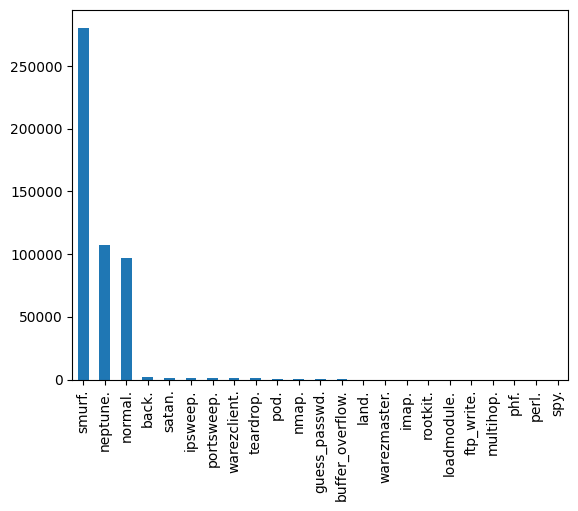

In [ ]:
train_10_percent['outcome'].value_counts().plot(kind="bar")
plt.show()

# Splitting the data

## Splitting by 0.02

In [ ]:
X_train02, X_test02, y_train02, y_test02 = train_test_split(
    train_10_percent.iloc[:, :-1],
    train_10_percent.iloc[:, -1],
    train_size=0.02,
    random_state=SEED,
    stratify=train_10_percent.iloc[:, -1],
)

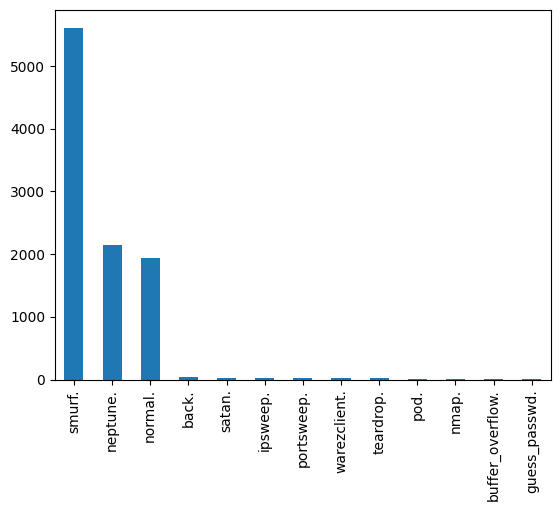

In [ ]:
y_train02.value_counts().plot(kind="bar")
plt.show()

In [ ]:
X_train02.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
215576,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
260869,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
197950,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
166006,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
110009,0,tcp,private,S0,0,0,0,0,0,0,...,255,5,0.02,0.08,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
X_train02.to_numpy()

array([[0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       ...,
       [0, 'tcp', 'private', ..., 0.0, 1.0, 1.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0]], dtype=object)

## Splitting by 0.025

In [ ]:
X_train025, X_test025, y_train025, y_test025 = train_test_split(
    train_10_percent.iloc[:, :-1],
    train_10_percent.iloc[:, -1],
    train_size=0.025,
    random_state=SEED,
    stratify=train_10_percent.iloc[:, -1],
)

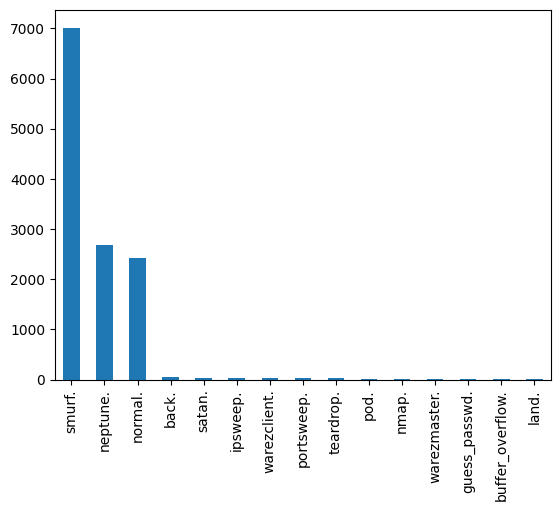

In [ ]:
y_train025.value_counts().plot(kind="bar")
plt.show()

In [ ]:
X_train025.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
154374,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0
78554,0,tcp,http,SF,248,293,0,0,0,0,...,19,236,1.0,0.0,0.05,0.02,0.0,0.0,0.0,0.0
35963,0,tcp,http,SF,374,10063,0,0,0,0,...,66,255,1.0,0.0,0.02,0.03,0.0,0.0,0.0,0.0
19926,0,tcp,http,SF,207,377,0,0,0,0,...,10,255,1.0,0.0,0.10,0.04,0.0,0.0,0.0,0.0
300920,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
X_train025.to_numpy()

array([[0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 0.0],
       ...,
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0]], dtype=object)

## splitting by 0.004

In [ ]:
X_train004, X_test004, y_train004, y_test004 = train_test_split(
    train_10_percent.iloc[:, :-1],
    train_10_percent.iloc[:, -1],
    train_size=0.004,
    random_state=SEED,
    stratify=train_10_percent.iloc[:, -1],
)

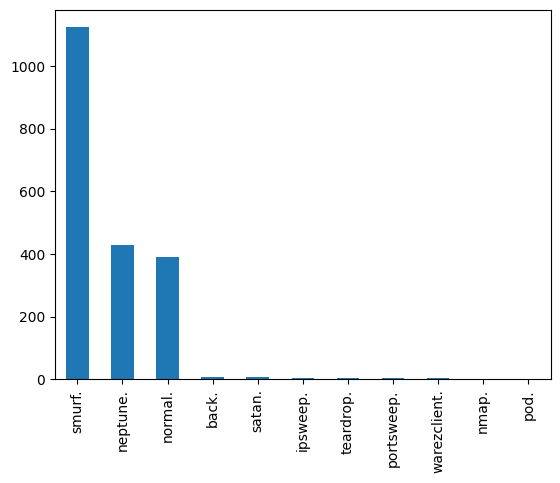

In [ ]:
y_train004.value_counts().plot(kind="bar")
plt.show()

In [ ]:
X_train004.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
259019,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.00
324041,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.00
249235,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.00
41387,0,tcp,http,REJ,0,0,0,0,0,0,...,2,255,1.0,0.0,0.5,0.06,0.0,0.0,1.0,0.78
405574,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.00


In [ ]:
X_train004.to_numpy()

array([[0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       ...,
       [0, 'icmp', 'ecr_i', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'private', ..., 1.0, 0.0, 0.0],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 0.0]], dtype=object)

# Investigating the dataset

In [ ]:
train_10_percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
train_10_percent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

## Comment
Elements with object dtype are categorical

In [ ]:
train_10_percent["protocol_type"].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [ ]:
train_10_percent["service"].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [ ]:
train_10_percent["flag"].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

## Comment
We will be trying both, label and one-hot encoding.

In [ ]:
test.shape

(311029, 42)

In [ ]:
train_10_percent.shape

(494021, 42)

In [ ]:
test_train = pd.concat([test, train_10_percent])
# concatenated as there are types of categories not available in train and others not available in test

In [ ]:
test_train["protocol_type"].value_counts()

icmp    448571
tcp     309422
udp      47057
Name: protocol_type, dtype: int64

In [ ]:
test_train.shape

(805050, 42)

### label encoding

In [ ]:
le_test = test.loc[:, test.columns != "outcome"].copy()
le_train_10_percent = train_10_percent.loc[
    :, train_10_percent.columns != "outcome"
].copy()
le_X_train02 = X_train02.copy()
le_X_train025 = X_train025.copy()
le_X_train004 = X_train004.copy()

In [ ]:
le = LabelEncoder()
features_to_encode = ["protocol_type", "service", "flag"]
for feature in features_to_encode:
    le.fit(test_train[feature].astype(str))
    le_test[feature] = le.transform(le_test[feature])
    le_train_10_percent[feature] = le.transform(le_train_10_percent[feature])
    le_X_train02[feature] = le.transform(le_X_train02[feature])
    le_X_train025[feature] = le.transform(le_X_train025[feature])
    le_X_train004[feature] = le.transform(le_X_train004[feature])
del test_train

In [ ]:
le_test.shape

(311029, 41)

In [ ]:
le_train_10_percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,22,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,22,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,22,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,22,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,22,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [ ]:
le_X_train02.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
215576,0,0,14,9,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
260869,0,0,14,9,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
197950,0,0,14,9,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
166006,0,0,14,9,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
110009,0,1,46,5,0,0,0,0,0,0,...,255,5,0.02,0.08,0.0,0.0,1.0,1.0,0.0,0.0


### one-hot encoding

In [ ]:
merged_data = pd.concat(
    [
        test.loc[:, test.columns != "outcome"],
        train_10_percent.loc[:, train_10_percent.columns != "outcome"],
        X_train02,
        X_train025,
        X_train004,
    ]
)

In [ ]:
features_to_encode = ["protocol_type", "service", "flag"]
for feature in features_to_encode:
    one_hot = pd.get_dummies(merged_data[feature], prefix=feature)
    merged_data = merged_data.drop(feature, axis=1)
    merged_data = pd.concat([merged_data, one_hot], axis=1)
oe_test = merged_data.iloc[: test.shape[0], :]
s = test.shape[0]
e = s + train_10_percent.shape[0]
oe_train_10_percent = merged_data.iloc[s:e, :]
s = e
e = s + X_train02.shape[0]
oe_X_train02 = merged_data.iloc[s:e, :]
s = e
e = s + X_train025.shape[0]
oe_X_train025 = merged_data.iloc[s:e, :]
s = e
oe_X_train004 = merged_data.iloc[s:, :]


In [ ]:
oe_test.shape

(311029, 119)

In [ ]:
oe_train_10_percent.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
oe_X_train02.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
215576,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
260869,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
197950,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
166006,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
110009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## label encoded y values

In [ ]:
le_y_test = test.loc[:, test.columns == "outcome"].copy().to_numpy().ravel()
le_y_train_10_percent = (
    train_10_percent.loc[:, train_10_percent.columns == "outcome"]
    .copy()
    .to_numpy()
    .ravel()
)
le_y_train02 = y_train02.copy()
le_y_train025 = y_train025.copy()
le_y_train004 = y_train004.copy()
labels_list = [
    le_y_test,
    le_y_train_10_percent,
    le_y_train02,
    le_y_train025,
    le_y_train004,
]

In [ ]:
le = LabelEncoder()

for i in range(len(labels_list)):
    labels_list[i] = le.fit_transform(labels_list[i])

In [ ]:
le_y_test = labels_list[0]
le_y_train_10_percent = labels_list[1]
le_y_train02 = labels_list[2]
le_y_train025 = labels_list[3]
le_y_train004 = labels_list[4]

In [ ]:
le_y_test

array([16, 16, 16, ..., 16, 16, 16])

In [ ]:
le_y_train_10_percent

array([11, 11, 11, ..., 11, 11, 11])

In [ ]:
le_y_train02

array([10, 10, 10, ...,  4, 10, 10])

# Runs

## KMeans

### Functions

In [ ]:
def get_distance_squared(x, y):
    return np.sum((x - y) ** 2, axis=1)

In [ ]:
def kmeans_plus_plus(X, k):
    # Randomly initialize the first centroid
    centroids = [X[np.random.choice(X.shape[0])]]
    # Randomly initialize the remaining k-1 centroids
    for _ in range(k - 1):
        # Compute the distance between each point and the nearest centroid
        D = [np.min(get_distance_squared(x, centroids)) for x in X]
        # Sample a new centroid from the data points with probability proportional to their distance from the nearest centroid
        probs = D / np.sum(D)
        centroids.append(X[np.random.choice(X.shape[0], replace=False, p=probs)])
    path_centroids = f"/content/drive/My Drive/pattern/2/centroids_0_{k}.csv"
    with open(path_centroids, "w", encoding="utf-8-sig") as f:
        pd.DataFrame(centroids).to_csv(f)
    print("Finished running k-means++")
    return np.array(centroids)

In [ ]:
def k_means(D, k, epsilon, max_iterations=100, fname="", random_state=SEED):
    np.random.seed(random_state)
    mu_t = kmeans_plus_plus(D, k)
    iter = 0
    labels = []

    while True:
        C = [[] for _ in range(k)]
        # Cluster Assignment Step
        m = 0
        labels = np.zeros(len(D))

        for x in D:
            dists = get_distance_squared(x, mu_t)
            centroid_idx = np.argmin(dists)
            C[centroid_idx].append(x)
            labels[m] = centroid_idx
            m += 1
        # Centroid Update Step
        mu_t1 = np.array([np.mean(cluster, axis=0) for cluster in C])
        for i, centroid in enumerate(mu_t1):
            if np.isnan(
                centroid
            ).any():  # Catch any np.nans, resulting from a centroid having no points
                mu_t1[i] = mu_t[i]
        # Check if the centroids have moved less than epsilon
        iter += 1
        dlabels = pd.DataFrame(labels)
        print(dlabels.value_counts())
        print(f"Completed iteration {iter}")
        path_label = f"/content/drive/My Drive/pattern/2/labels_{iter}_{k}_{fname}.csv"
        path_centroids = (
            f"/content/drive/My Drive/pattern/2/centroids_{iter}_{k}_{fname}.csv"
        )
        with open(path_label, "w", encoding="utf-8-sig") as f:
            dlabels.to_csv(f)
        with open(path_centroids, "w", encoding="utf-8-sig") as f:
            pd.DataFrame(mu_t1).to_csv(f)
        current_eps = np.linalg.norm(mu_t1 - mu_t, axis=1)
        mu_t = mu_t1
        if np.all(current_eps <= epsilon):
            print(f"Epsilon has a maximum value of {np.max(current_eps)}")
            break
        if iter > max_iterations:
            print(f"Reached {iter} iterations")
            break
    return mu_t, C

In [ ]:
def k_means_predict(D, mu_t):
    labels = []
    k = len(mu_t)
    for x in D:
        dists = get_distance_squared(x, mu_t)
        centroid_idx = np.argmin(dists)
        labels.append(centroid_idx)
    return labels

### label encoded run

In [ ]:
clusters = [7, 15, 23, 31, 45]
epsilon = 0.1
for k in clusters:
    print(f"{k} clusters:")
    mu_t, C = k_means(
        le_train_10_percent.to_numpy(),
        k,
        epsilon,
        max_iterations=10,
        fname="label_encoded_kmeans",
    )
    print("Centroids:")
    for i in range(k):
        print(f"Centroid {i+1}: {mu_t[i]}")

7 clusters:
Finished running k-means++
0.0    493870
3.0        59
6.0        41
4.0        24
2.0        18
5.0         8
1.0         1
dtype: int64
Completed iteration 1
0.0    493871
3.0        59
6.0        39
4.0        24
2.0        18
5.0         9
1.0         1
dtype: int64
Completed iteration 2
0.0    493871
3.0        59
6.0        38
4.0        24
2.0        18
5.0        10
1.0         1
dtype: int64
Completed iteration 3
0.0    493871
3.0        59
6.0        36
4.0        24
2.0        18
5.0        12
1.0         1
dtype: int64
Completed iteration 4
0.0    493869
3.0        59
6.0        36
4.0        24
2.0        18
5.0        14
1.0         1
dtype: int64
Completed iteration 5
0.0    493868
3.0        59
6.0        34
4.0        24
2.0        18
5.0        17
1.0         1
dtype: int64
Completed iteration 6
0.0    493862
3.0        59
6.0        40
4.0        24
2.0        18
5.0        17
1.0         1
dtype: int64
Completed iteration 7
0.0    493859
3.0        59
6.

### one-hot encoded run

In [ ]:
clusters = [7, 15, 23, 31, 45]
epsilon = 0.1
for k in clusters:
    print(f"{k} clusters:")
    mu_t, C = k_means(
        oe_train_10_percent.to_numpy(),
        k,
        epsilon,
        max_iterations=10,
        fname="one-hot_encoded_kmeans",
    )
    print("Centroids:")
    for i in range(k):
        print(f"Centroid {i+1}: {mu_t[i]}")

7 clusters:
Finished running k-means++
0.0    493870
3.0        59
6.0        41
4.0        24
2.0        18
5.0         8
1.0         1
dtype: int64
Completed iteration 1
0.0    493871
3.0        59
6.0        39
4.0        24
2.0        18
5.0         9
1.0         1
dtype: int64
Completed iteration 2
0.0    493871
3.0        59
6.0        38
4.0        24
2.0        18
5.0        10
1.0         1
dtype: int64
Completed iteration 3
0.0    493871
3.0        59
6.0        36
4.0        24
2.0        18
5.0        12
1.0         1
dtype: int64
Completed iteration 4
0.0    493869
3.0        59
6.0        36
4.0        24
2.0        18
5.0        14
1.0         1
dtype: int64
Completed iteration 5
0.0    493868
3.0        59
6.0        34
4.0        24
2.0        18
5.0        17
1.0         1
dtype: int64
Completed iteration 6
0.0    493862
3.0        59
6.0        40
4.0        24
2.0        18
5.0        17
1.0         1
dtype: int64
Completed iteration 7
0.0    493859
3.0        59
6.

## Spectral

### Functions

In [ ]:
def get_similarity_matrix(data, affinity, gamma=1.0):
    if affinity == "additive_chi2":
        return additive_chi2_kernel(data, data)
    elif affinity == "chi2":
        return chi2_kernel(data, data, gamma=gamma)
    elif affinity == "cosine_similarity":
        return cosine_similarity(data, data)
    elif affinity == "laplacian":
        return laplacian_kernel(data, data, gamma=gamma)
    elif affinity == "linear":
        return linear_kernel(data, data)
    elif affinity == "poly":
        return polynomial_kernel(data, data, gamma=gamma)
    elif affinity == "rbf":
        return rbf_kernel(data, data, gamma=gamma)
    elif affinity == "sigmoid":
        return sigmoid_kernel(data, data, gamma=gamma)
    else:
        print(f"Error, unknown similarity matrix '{affinity}'.")

In [ ]:
def spectral_clustering(
    data, cuts=23, fname="label_encoded_spectral_clustering", affinity="rbf", gamma=1.0
):
    similarity_matrix = get_similarity_matrix(data, affinity, gamma)
    degree_matrix = jnp.diag(jnp.sum(similarity_matrix, axis=1))
    laplace_matrix = degree_matrix - similarity_matrix
    asymmetric_laplacian_matrix = jnp.dot(jnp.linalg.inv(degree_matrix), laplace_matrix)
    u, s, vh = jnp.linalg.svd(asymmetric_laplacian_matrix)
    eigenvalues = np.array((s**2)[-cuts:])
    eigenvectors = np.array((vh.T)[:, -cuts:])
    print(f"eigenvalues: {eigenvalues}.")
    row_norm = np.linalg.norm(eigenvectors, axis=1)
    row_norm[row_norm == 0] = np.finfo(float).eps  # epsilon to avoid dividing by 0
    normalized_eigenvectors = (eigenvectors.T / row_norm).T
    mu_t, C = k_means(
        normalized_eigenvectors,
        cuts,
        0.01,
        max_iterations=20,
        fname=f"{fname}_{affinity}_{gamma}",
    )
    print("Centroids:")
    for i in range(cuts):
        print(f"Centroid {i+1}: {mu_t[i]}")

### label encoded run

#### additive chi2

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="additive_chi2",
)

eigenvalues: [9.9994218e-01 9.9993670e-01 9.9993050e-01 9.9992669e-01 9.9992478e-01
 9.9991786e-01 9.9990880e-01 9.9990809e-01 9.9989295e-01 9.9989140e-01
 9.9988294e-01 9.9987543e-01 9.9986076e-01 9.9985075e-01 9.9984241e-01
 9.9981344e-01 9.9978900e-01 9.9978054e-01 9.9957687e-01 9.9945992e-01
 9.9930036e-01 9.9831045e-01 4.1195020e-13].
Finished running k-means++
2.0     6179
0.0      871
13.0     684
8.0      490
1.0      463
15.0     462
11.0     415
17.0     327
4.0      294
9.0      288
21.0     286
3.0      247
20.0     233
10.0     216
7.0      200
22.0     181
12.0     155
19.0     137
5.0      100
16.0      93
14.0      16
18.0       8
6.0        5
dtype: int64
Completed iteration 1
2.0     5711
0.0      874
13.0     758
1.0      489
15.0     474
8.0      414
3.0      391
11.0     376
21.0     369
10.0     305
17.0     300
9.0      297
4.0      288
22.0     255
20.0     245
7.0      192
12.0     167
19.0     144
16.0     118
5.0      104
14.0      59
18.0      14
6.0        

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="additive_chi2",
)

eigenvalues: [9.9989295e-01 9.9989140e-01 9.9988294e-01 9.9987543e-01 9.9986076e-01
 9.9985075e-01 9.9984241e-01 9.9981344e-01 9.9978900e-01 9.9978054e-01
 9.9957687e-01 9.9945992e-01 9.9930036e-01 9.9831045e-01 4.1195020e-13].
Finished running k-means++
6.0     7023
0.0     1224
9.0      849
4.0      632
11.0     519
13.0     426
10.0     415
7.0      261
2.0      249
1.0      210
8.0      210
12.0     197
5.0       93
3.0       22
14.0      20
dtype: int64
Completed iteration 1
6.0     6161
4.0     1083
9.0      970
11.0     700
0.0      673
13.0     555
12.0     435
10.0     423
7.0      315
2.0      293
1.0      272
8.0      244
5.0       85
14.0      75
3.0       66
dtype: int64
Completed iteration 2
6.0     6039
4.0      961
9.0      929
0.0      744
11.0     658
13.0     541
12.0     439
10.0     413
7.0      385
2.0      352
1.0      315
8.0      256
14.0     147
3.0       90
5.0       81
dtype: int64
Completed iteration 3
6.0     5969
4.0      890
9.0      864
0.0      776
11.

#### chi2 (gamma=1.0)

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="chi2",
    gamma=1.0,
)

eigenvalues: [2.6221762e-19 2.4052815e-19 2.2685185e-19 1.3915577e-19 9.3171291e-20
 3.4807156e-20 2.3142795e-20 2.1908691e-20 1.9799733e-20 1.1253153e-20
 9.7675304e-21 5.5794883e-21 1.3039654e-21 1.9227013e-23 1.6587635e-23
 1.9446219e-26 8.0945478e-28 4.7445640e-28 2.4413591e-31 1.1103889e-41
 5.2969082e-43 0.0000000e+00 0.0000000e+00].
Finished running k-means++
0.0     5394
8.0     1764
12.0     801
4.0      534
3.0      514
13.0     420
10.0     373
6.0      275
2.0      235
20.0     233
5.0      218
16.0     206
22.0     206
7.0      175
15.0     138
21.0     134
9.0      129
18.0     111
11.0     108
17.0     105
1.0       98
14.0      95
19.0      84
dtype: int64
Completed iteration 1
0.0     5255
8.0     1672
12.0     742
4.0      573
3.0      393
13.0     367
10.0     341
5.0      333
6.0      309
20.0     272
15.0     232
22.0     222
2.0      218
7.0      193
19.0     182
16.0     174
9.0      166
18.0     135
1.0      124
21.0     118
11.0     118
17.0     114
14.0      9

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="chi2",
    gamma=1.0,
)

eigenvalues: [1.9799733e-20 1.1253153e-20 9.7675304e-21 5.5794883e-21 1.3039654e-21
 1.9227013e-23 1.6587635e-23 1.9446219e-26 8.0945478e-28 4.7445640e-28
 2.4413591e-31 1.1103889e-41 5.2969082e-43 0.0000000e+00 0.0000000e+00].
Finished running k-means++
0.0     5464
7.0     1872
12.0    1067
10.0     694
3.0      542
2.0      472
5.0      337
13.0     327
6.0      322
9.0      295
8.0      222
1.0      216
4.0      213
14.0     197
11.0     110
dtype: int64
Completed iteration 1
0.0     5326
7.0     1751
12.0     925
10.0     688
2.0      595
3.0      555
6.0      353
13.0     342
11.0     285
5.0      284
8.0      265
9.0      261
1.0      249
14.0     244
4.0      227
dtype: int64
Completed iteration 2
0.0     5319
7.0     1731
12.0     864
10.0     686
2.0      568
3.0      492
13.0     388
6.0      359
11.0     359
1.0      303
5.0      273
9.0      270
8.0      256
14.0     247
4.0      235
dtype: int64
Completed iteration 3
0.0     5321
7.0     1718
12.0     840
10.0     673
2.0

#### cosine similarity

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="cosine_similarity",
)

eigenvalues: [9.9997211e-01 9.9997127e-01 9.9996638e-01 9.9996495e-01 9.9996364e-01
 9.9995828e-01 9.9995637e-01 9.9994946e-01 9.9994898e-01 9.9993622e-01
 9.9993587e-01 9.9991393e-01 9.9985385e-01 9.9974275e-01 9.9957317e-01
 9.8984689e-01 9.8099512e-01 9.2098027e-01 8.4413648e-01 6.5789407e-01
 4.5537400e-01 2.8281984e-01 1.5033727e-10].
Finished running k-means++
17.0    3003
2.0     2637
4.0     1153
1.0      989
3.0      730
0.0      710
8.0      468
6.0      325
16.0     301
5.0      256
20.0     253
12.0     251
22.0     243
11.0     232
21.0     219
9.0      204
10.0     130
7.0       93
19.0      50
15.0      40
13.0      32
14.0      20
18.0      11
dtype: int64
Completed iteration 1
2.0     2908
17.0    2727
4.0     1143
1.0      978
3.0      706
0.0      615
8.0      511
22.0     300
16.0     294
6.0      275
20.0     263
11.0     257
12.0     228
21.0     217
9.0      203
5.0      201
10.0     152
7.0      110
18.0      82
19.0      59
15.0      50
14.0      37
13.0      3

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="cosine_similarity",
)

eigenvalues: [9.9994898e-01 9.9993622e-01 9.9993587e-01 9.9991393e-01 9.9985385e-01
 9.9974275e-01 9.9957317e-01 9.8984689e-01 9.8099512e-01 9.2098027e-01
 8.4413648e-01 6.5789407e-01 4.5537400e-01 2.8281984e-01 1.5033727e-10].
Finished running k-means++
2.0     5645
6.0     1376
5.0     1267
0.0     1015
1.0      928
8.0      435
7.0      414
9.0      320
13.0     289
4.0      275
10.0     169
3.0      115
12.0      81
11.0      14
14.0       7
dtype: int64
Completed iteration 1
2.0     5641
6.0     1374
5.0     1140
0.0     1014
1.0      980
8.0      424
7.0      417
13.0     413
4.0      270
9.0      264
10.0     170
3.0      116
12.0      93
14.0      18
11.0      16
dtype: int64
Completed iteration 2
2.0     5639
6.0     1373
5.0     1063
1.0     1007
0.0     1000
13.0     486
7.0      412
8.0      408
4.0      270
9.0      258
10.0     162
3.0      116
12.0     110
14.0      29
11.0      17
dtype: int64
Completed iteration 3
2.0     5639
6.0     1372
1.0     1028
5.0     1015
0.0

#### laplacian (gamma=1.0)

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="laplacian",
    gamma=1.0,
)

eigenvalues: [5.7334851e-19 5.5113447e-19 5.0807765e-19 4.9898192e-19 2.0943001e-19
 1.3833109e-19 1.0561118e-19 5.8463038e-20 4.7164481e-20 4.3019899e-20
 3.8184838e-20 2.6893362e-20 2.0205838e-20 1.1847787e-20 2.0182436e-21
 1.2437433e-21 8.0380534e-23 6.3748079e-24 9.5652944e-25 7.5414136e-31
 4.0227215e-40 0.0000000e+00 0.0000000e+00].
Finished running k-means++
10.0    3546
0.0     1834
19.0    1143
16.0     505
9.0      461
11.0     431
15.0     428
18.0     403
17.0     374
14.0     362
8.0      331
2.0      318
5.0      288
13.0     285
20.0     260
12.0     233
22.0     219
21.0     211
1.0      200
3.0      164
6.0      145
4.0      105
7.0      104
dtype: int64
Completed iteration 1
10.0    3294
0.0     1635
19.0    1108
9.0      483
17.0     450
16.0     439
15.0     430
11.0     426
18.0     396
14.0     393
2.0      388
5.0      386
8.0      343
20.0     294
13.0     261
21.0     239
22.0     237
1.0      235
12.0     231
3.0      200
7.0      176
6.0      169
4.0      13

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="laplacian",
    gamma=1.0,
)

eigenvalues: [4.7164481e-20 4.3019899e-20 3.8184838e-20 2.6893362e-20 2.0205838e-20
 1.1847787e-20 2.0182436e-21 1.2437433e-21 8.0380534e-23 6.3748079e-24
 9.5652944e-25 7.5414136e-31 4.0227215e-40 0.0000000e+00 0.0000000e+00].
Finished running k-means++
1.0     3572
0.0     3087
14.0     921
2.0      732
11.0     533
4.0      492
5.0      439
8.0      439
9.0      413
12.0     408
3.0      361
10.0     287
13.0     257
6.0      208
7.0      201
dtype: int64
Completed iteration 1
1.0     3488
0.0     2950
14.0     855
2.0      704
4.0      493
11.0     486
8.0      483
12.0     466
9.0      435
5.0      419
6.0      373
3.0      353
10.0     289
13.0     288
7.0      268
dtype: int64
Completed iteration 2
1.0     3484
0.0     2947
14.0     819
2.0      650
8.0      507
12.0     496
4.0      468
11.0     464
6.0      433
9.0      421
5.0      413
3.0      346
7.0      315
13.0     296
10.0     291
dtype: int64
Completed iteration 3
1.0     3482
0.0     2946
14.0     784
2.0      631
8.0

#### linear

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="linear",
)

eigenvalues: [9.9989665e-01 9.9986744e-01 9.9986207e-01 9.9983287e-01 9.9981642e-01
 9.9980986e-01 9.9979889e-01 9.9977648e-01 9.9975729e-01 9.9971628e-01
 9.9965149e-01 9.9960595e-01 9.9957544e-01 9.9951214e-01 9.9909729e-01
 9.9871284e-01 9.9773747e-01 9.7577429e-01 9.6599168e-01 8.1473356e-01
 3.7500587e-01 9.3694995e-05 2.6699167e-11].
Finished running k-means++
1.0     5645
0.0     1127
2.0      896
11.0     856
5.0      644
22.0     492
7.0      271
6.0      256
8.0      236
9.0      226
12.0     224
3.0      199
20.0     192
15.0     170
17.0     170
13.0     160
10.0     138
16.0     121
21.0      94
14.0      87
4.0       86
19.0      39
18.0      21
dtype: int64
Completed iteration 1
1.0     5633
0.0     1135
2.0      897
11.0     769
5.0      717
22.0     494
7.0      272
8.0      210
6.0      209
9.0      203
15.0     202
3.0      200
12.0     190
20.0     183
13.0     178
17.0     171
10.0     137
14.0     119
16.0     108
21.0     103
4.0       90
19.0      74
18.0      5

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="linear",
)

eigenvalues: [9.9975729e-01 9.9971628e-01 9.9965149e-01 9.9960595e-01 9.9957544e-01
 9.9951214e-01 9.9909729e-01 9.9871284e-01 9.9773747e-01 9.7577429e-01
 9.6599168e-01 8.1473356e-01 3.7500587e-01 9.3694995e-05 2.6699167e-11].
Finished running k-means++
2.0     5645
5.0     1505
3.0     1407
0.0     1194
7.0      356
13.0     342
1.0      323
12.0     305
9.0      281
10.0     242
8.0      200
4.0      190
6.0      143
11.0     109
14.0     108
dtype: int64
Completed iteration 1
2.0     5638
5.0     1480
3.0     1403
0.0     1169
7.0      359
1.0      341
13.0     331
9.0      276
12.0     264
10.0     259
4.0      203
14.0     195
8.0      184
6.0      139
11.0     109
dtype: int64
Completed iteration 2
2.0     5637
5.0     1477
3.0     1403
0.0     1164
7.0      364
1.0      333
13.0     331
9.0      275
12.0     263
10.0     259
4.0      213
14.0     207
8.0      176
6.0      139
11.0     109
dtype: int64
Completed iteration 3
2.0     5637
5.0     1474
3.0     1403
0.0     1164
7.0

#### poly (gamma=1.0 / n_features)

In [ ]:
n_features = le_X_train025.shape[1]
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="poly",
    gamma=1.0 / n_features,
)

eigenvalues: [9.9989295e-01 9.9988639e-01 9.9987376e-01 9.9985456e-01 9.9983513e-01
 9.9982941e-01 9.9978435e-01 9.9975431e-01 9.9957722e-01 9.9950296e-01
 9.9948639e-01 9.9938047e-01 9.9815810e-01 9.9683940e-01 9.9626154e-01
 9.9614918e-01 9.8223424e-01 9.7860557e-01 9.7008169e-01 8.7460905e-01
 4.2129523e-01 3.6216567e-16 2.4852591e-20].
Finished running k-means++
1.0     5699
22.0     826
15.0     751
4.0      692
9.0      595
8.0      521
21.0     512
0.0      367
10.0     331
2.0      287
7.0      278
5.0      247
6.0      233
17.0     196
16.0     164
13.0     152
3.0      152
12.0     101
11.0     100
20.0      93
19.0      35
18.0      15
14.0       3
dtype: int64
Completed iteration 1
1.0     5704
22.0     803
15.0     754
4.0      705
8.0      497
21.0     492
9.0      472
0.0      325
7.0      320
10.0     296
3.0      282
2.0      278
6.0      270
5.0      209
13.0     208
17.0     199
16.0     179
12.0      95
11.0      92
20.0      90
19.0      50
18.0      24
14.0       

In [ ]:
n_features = le_X_train025.shape[1]
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="poly",
    gamma=1.0 / n_features,
)

eigenvalues: [9.9957722e-01 9.9950296e-01 9.9948639e-01 9.9938047e-01 9.9815810e-01
 9.9683940e-01 9.9626154e-01 9.9614918e-01 9.8223424e-01 9.7860557e-01
 9.7008169e-01 8.7460905e-01 4.2129523e-01 3.6216567e-16 2.4852591e-20].
Finished running k-means++
3.0     6536
0.0     1338
10.0    1060
1.0      684
6.0      671
13.0     609
9.0      410
11.0     246
2.0      237
12.0     221
4.0      105
5.0      104
8.0       90
7.0       35
14.0       4
dtype: int64
Completed iteration 1
3.0     6526
0.0     1258
10.0    1028
6.0      781
1.0      666
13.0     624
9.0      398
11.0     266
2.0      242
12.0     235
4.0      105
5.0       97
8.0       79
7.0       41
14.0       4
dtype: int64
Completed iteration 2
3.0     6526
0.0     1169
10.0    1044
6.0      838
1.0      661
13.0     632
9.0      390
11.0     264
12.0     247
2.0      243
4.0      103
5.0       96
8.0       76
7.0       57
14.0       4
dtype: int64
Completed iteration 3
3.0     6526
0.0     1109
10.0    1022
6.0      832
1.0

#### poly (gamma=0.1)

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="poly",
    gamma=0.1,
)

eigenvalues: [9.9988770e-01 9.9985909e-01 9.9984884e-01 9.9982798e-01 9.9978435e-01
 9.9975991e-01 9.9975038e-01 9.9972260e-01 9.9954313e-01 9.9944788e-01
 9.9937046e-01 9.9839300e-01 9.9811047e-01 9.9684560e-01 9.9625939e-01
 9.9615240e-01 9.8222405e-01 9.7860873e-01 9.7007835e-01 8.7461907e-01
 4.2127913e-01 1.8779957e-16 5.0089715e-19].
Finished running k-means++
3.0     6508
2.0      634
1.0      632
21.0     610
7.0      500
10.0     494
6.0      440
13.0     328
22.0     310
4.0      288
17.0     274
5.0      249
0.0      211
9.0      165
16.0     143
11.0     108
19.0      97
20.0      93
12.0      89
8.0       78
15.0      76
18.0      13
14.0      10
dtype: int64
Completed iteration 1
3.0     6503
21.0     618
2.0      617
10.0     490
7.0      482
1.0      446
6.0      429
13.0     317
22.0     316
17.0     313
5.0      291
9.0      289
4.0      278
0.0      224
11.0     147
16.0     136
12.0      99
20.0      88
19.0      76
8.0       69
15.0      67
18.0      45
14.0      1

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="poly",
    gamma=0.1,
)

eigenvalues: [9.9954313e-01 9.9944788e-01 9.9937046e-01 9.9839300e-01 9.9811047e-01
 9.9684560e-01 9.9625939e-01 9.9615240e-01 9.8222405e-01 9.7860873e-01
 9.7007835e-01 8.7461907e-01 4.2127913e-01 1.8779957e-16 5.0089715e-19].
Finished running k-means++
4.0     6539
2.0      960
7.0      741
0.0      646
13.0     623
3.0      544
5.0      519
6.0      453
8.0      365
1.0      312
12.0     274
11.0     206
9.0       99
10.0      50
14.0      19
dtype: int64
Completed iteration 1
4.0     6521
2.0      872
7.0      679
13.0     651
0.0      590
6.0      560
5.0      497
11.0     463
8.0      341
1.0      305
12.0     304
3.0      260
14.0     117
9.0      102
10.0      88
dtype: int64
Completed iteration 2
4.0     6522
2.0      831
13.0     684
7.0      672
6.0      595
0.0      562
11.0     515
5.0      495
8.0      327
3.0      282
1.0      273
12.0     244
10.0     140
14.0     105
9.0      103
dtype: int64
Completed iteration 3
4.0     6522
2.0      798
13.0     706
7.0      675
6.0

#### poly (gamma=0.15)

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="poly",
    gamma=0.15,
)

eigenvalues: [9.9994981e-01 9.9994802e-01 9.9992979e-01 9.9984801e-01 9.9983108e-01
 9.9981737e-01 9.9977839e-01 9.9976015e-01 9.9957794e-01 9.9942619e-01
 9.9812502e-01 9.9682689e-01 9.9625343e-01 9.9596763e-01 9.8182416e-01
 9.7822905e-01 9.7001499e-01 8.7461996e-01 4.2127788e-01 7.4355703e-14
 5.6841887e-14 1.4760132e-15 8.1958574e-20].
Finished running k-means++
1.0     6615
2.0      886
8.0      556
5.0      495
4.0      489
3.0      442
22.0     334
0.0      322
12.0     311
15.0     302
16.0     286
20.0     256
21.0     255
6.0      207
9.0      166
7.0      139
19.0      98
10.0      85
11.0      39
17.0      30
13.0      25
18.0       9
14.0       3
dtype: int64
Completed iteration 1
1.0     6518
2.0      783
12.0     576
8.0      542
5.0      486
3.0      467
4.0      441
22.0     341
15.0     341
16.0     321
0.0      283
6.0      193
20.0     179
21.0     153
19.0     142
7.0      140
9.0      134
11.0     110
10.0      84
13.0      64
17.0      30
18.0      19
14.0       

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="poly",
    gamma=0.15,
)

eigenvalues: [9.9957794e-01 9.9942619e-01 9.9812502e-01 9.9682689e-01 9.9625343e-01
 9.9596763e-01 9.8182416e-01 9.7822905e-01 9.7001499e-01 8.7461996e-01
 4.2127788e-01 7.4355703e-14 5.6841887e-14 1.4760132e-15 8.1958574e-20].
Finished running k-means++
1.0     6533
2.0      917
4.0      673
0.0      598
14.0     582
8.0      564
11.0     543
10.0     507
13.0     395
9.0      274
7.0      255
12.0     247
3.0      151
6.0      107
5.0        4
dtype: int64
Completed iteration 1
1.0     6533
2.0      805
4.0      640
11.0     627
14.0     608
8.0      606
0.0      572
10.0     501
13.0     378
9.0      268
12.0     256
7.0      227
3.0      218
6.0      102
5.0        9
dtype: int64
Completed iteration 2
1.0     6533
2.0      772
11.0     663
4.0      631
8.0      619
14.0     616
0.0      557
10.0     501
13.0     380
9.0      260
12.0     256
3.0      231
7.0      220
6.0       98
5.0       13
dtype: int64
Completed iteration 3
1.0     6533
2.0      761
11.0     685
4.0      625
14.

#### rbf (gamma=1.0)

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="rbf",
    gamma=1.0,
)

eigenvalues: [2.3329157e-18 2.2065703e-18 2.0632335e-18 1.7459047e-18 1.6057179e-18
 7.8783308e-19 7.0039321e-19 4.6904418e-19 4.2392001e-19 2.8425227e-19
 2.0007891e-19 1.3124208e-19 7.2209598e-20 6.9068030e-20 2.1548276e-20
 2.8687060e-21 9.1183435e-22 3.7461878e-23 2.4632515e-23 6.9405777e-27
 3.5174635e-30 5.0740151e-35 0.0000000e+00].
Finished running k-means++
0.0     3500
2.0     3096
22.0     614
1.0      467
18.0     463
9.0      440
3.0      357
19.0     322
4.0      288
20.0     285
17.0     280
16.0     271
6.0      239
15.0     228
21.0     222
8.0      196
10.0     193
11.0     186
7.0      177
12.0     168
5.0      128
14.0     118
13.0     112
dtype: int64
Completed iteration 1
0.0     3411
2.0     3012
1.0      528
22.0     491
9.0      413
18.0     381
17.0     343
16.0     332
3.0      330
15.0     294
4.0      273
19.0     270
7.0      269
20.0     246
12.0     226
10.0     223
11.0     221
6.0      217
21.0     213
8.0      203
5.0      163
13.0     157
14.0     13

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="rbf",
    gamma=1.0,
)

eigenvalues: [4.2392001e-19 2.8425227e-19 2.0007891e-19 1.3124208e-19 7.2209598e-20
 6.9068030e-20 2.1548276e-20 2.8687060e-21 9.1183435e-22 3.7461878e-23
 2.4632515e-23 6.9405777e-27 3.5174635e-30 5.0740151e-35 0.0000000e+00].
Finished running k-means++
0.0     3629
1.0     3121
3.0      690
2.0      636
9.0      597
10.0     487
6.0      485
4.0      469
14.0     440
7.0      429
8.0      321
5.0      309
13.0     297
12.0     252
11.0     188
dtype: int64
Completed iteration 1
0.0     3452
1.0     3029
3.0      632
9.0      622
2.0      618
4.0      514
14.0     472
13.0     446
10.0     439
7.0      423
8.0      403
6.0      362
5.0      356
12.0     317
11.0     265
dtype: int64
Completed iteration 2
0.0     3452
1.0     3032
9.0      621
2.0      576
3.0      558
4.0      496
10.0     479
13.0     461
14.0     452
8.0      443
7.0      432
5.0      386
12.0     348
6.0      307
11.0     307
dtype: int64
Completed iteration 3
0.0     3449
1.0     3032
9.0      618
2.0      535
10.

#### sigmoid (gamma=1.0)

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=23,
    fname="label_encoded_spectral_clustering",
    affinity="sigmoid",
    gamma=1.0,
)

eigenvalues: [9.9998307e-01 9.9998295e-01 9.9998224e-01 9.9998140e-01 9.9998116e-01
 9.9998021e-01 9.9997973e-01 9.9997580e-01 9.9997330e-01 9.9996972e-01
 9.9996853e-01 9.9996841e-01 9.9996662e-01 9.9996483e-01 9.9995112e-01
 9.9994552e-01 9.9993980e-01 9.9992824e-01 9.9991274e-01 9.9991250e-01
 9.9990833e-01 9.9983191e-01 3.5868186e-09].
Finished running k-means++
15.0    5203
0.0     1756
13.0    1010
16.0     743
1.0      645
12.0     546
8.0      486
7.0      408
3.0      282
10.0     227
9.0      190
2.0      135
4.0      124
20.0      95
22.0      83
5.0       81
17.0      74
6.0       68
18.0      63
11.0      59
21.0      48
19.0      22
14.0       2
dtype: int64
Completed iteration 1
15.0    4824
0.0     1317
13.0    1057
12.0     629
16.0     626
1.0      622
8.0      548
7.0      421
10.0     351
3.0      283
9.0      241
2.0      193
17.0     180
4.0      176
18.0     157
5.0      146
6.0      135
11.0     110
22.0     102
20.0      94
21.0      78
19.0      58
14.0       

In [ ]:
spectral_clustering(
    le_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="label_encoded_spectral_clustering",
    affinity="sigmoid",
    gamma=1.0,
)

eigenvalues: [9.9997330e-01 9.9996972e-01 9.9996853e-01 9.9996841e-01 9.9996662e-01
 9.9996483e-01 9.9995112e-01 9.9994552e-01 9.9993980e-01 9.9992824e-01
 9.9991274e-01 9.9991250e-01 9.9990833e-01 9.9983191e-01 3.5868186e-09].
Finished running k-means++
13.0    4902
0.0     2559
3.0     1211
12.0    1108
10.0     710
11.0     488
7.0      280
2.0      260
5.0      227
9.0      209
4.0      167
8.0       83
1.0       79
6.0       65
14.0       2
dtype: int64
Completed iteration 1
13.0    4938
0.0     2232
12.0    1208
3.0     1020
10.0     607
11.0     482
7.0      340
5.0      339
2.0      331
4.0      265
9.0      197
1.0      141
8.0      141
6.0      107
14.0       2
dtype: int64
Completed iteration 2
13.0    5013
0.0     1951
12.0    1148
3.0     1002
10.0     599
7.0      525
11.0     426
5.0      353
2.0      335
4.0      306
9.0      202
8.0      171
1.0      169
6.0      148
14.0       2
dtype: int64
Completed iteration 3
13.0    4902
0.0     1917
12.0    1080
3.0      987
7.0

### one-hot encoded run

#### additive chi2

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="additive_chi2",
)

eigenvalues: [9.9994206e-01 9.9993849e-01 9.9993706e-01 9.9993253e-01 9.9992669e-01
 9.9992490e-01 9.9991310e-01 9.9991131e-01 9.9990904e-01 9.9990523e-01
 9.9989450e-01 9.9988222e-01 9.9986792e-01 9.9985254e-01 9.9984121e-01
 9.9983311e-01 9.9983084e-01 9.9981248e-01 9.9977577e-01 9.9968719e-01
 9.9947876e-01 9.9825495e-01 2.1680598e-12].
Finished running k-means++
8.0     6303
1.0      894
17.0     608
2.0      462
19.0     395
4.0      364
22.0     357
16.0     307
3.0      304
7.0      276
11.0     252
21.0     227
10.0     219
9.0      211
5.0      211
0.0      191
6.0      185
12.0     184
13.0     152
15.0     139
20.0      92
18.0      10
14.0       7
dtype: int64
Completed iteration 1
8.0     5834
1.0      769
17.0     621
2.0      489
22.0     468
19.0     416
4.0      412
3.0      391
7.0      335
0.0      281
15.0     263
16.0     248
11.0     240
21.0     235
6.0      217
12.0     216
10.0     202
9.0      194
5.0      187
13.0     186
20.0     113
18.0      21
14.0      1

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="additive_chi2",
)

eigenvalues: [9.9990904e-01 9.9990523e-01 9.9989450e-01 9.9988222e-01 9.9986792e-01
 9.9985254e-01 9.9984121e-01 9.9983311e-01 9.9983084e-01 9.9981248e-01
 9.9977577e-01 9.9968719e-01 9.9947876e-01 9.9825495e-01 2.1680598e-12].
Finished running k-means++
8.0     5558
2.0     2056
13.0     785
12.0     663
0.0      654
9.0      428
14.0     391
11.0     351
4.0      311
6.0      298
7.0      252
5.0      239
1.0      164
3.0      105
10.0      95
dtype: int64
Completed iteration 1
8.0     5890
2.0     1152
12.0     729
14.0     699
9.0      626
0.0      607
6.0      464
11.0     418
13.0     340
1.0      335
4.0      310
5.0      233
7.0      231
3.0      188
10.0     128
dtype: int64
Completed iteration 2
8.0     6030
2.0      859
12.0     757
14.0     733
0.0      703
9.0      664
6.0      463
11.0     447
1.0      409
4.0      297
3.0      245
5.0      235
7.0      229
10.0     148
13.0     131
dtype: int64
Completed iteration 3
8.0     6067
2.0      765
12.0     743
14.0     743
0.0

#### chi2 (gamma=1.0)

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="chi2",
    gamma=1.0,
)

eigenvalues: [4.2849140e-19 2.1978150e-19 1.3190085e-19 1.2006251e-19 1.1135112e-19
 7.6815985e-20 2.8767852e-20 1.8580284e-20 3.8743233e-21 1.2061609e-21
 6.5826805e-22 3.1409243e-22 9.0774635e-23 6.4550626e-23 2.3096634e-23
 1.9380088e-26 4.0186283e-28 2.2241039e-29 4.3910724e-33 1.0208590e-38
 1.4979881e-41 1.7376101e-43 0.0000000e+00].
Finished running k-means++
0.0     5335
1.0     1400
3.0      871
13.0     551
15.0     540
10.0     441
12.0     409
20.0     269
6.0      245
2.0      224
5.0      222
14.0     217
9.0      211
18.0     181
21.0     176
16.0     146
22.0     145
19.0     139
17.0     135
8.0      133
11.0     133
7.0      121
4.0      106
dtype: int64
Completed iteration 1
0.0     5233
1.0     1346
3.0      797
13.0     574
15.0     438
12.0     417
10.0     398
6.0      257
2.0      250
20.0     246
14.0     241
9.0      238
16.0     216
5.0      208
22.0     207
11.0     205
21.0     188
18.0     172
17.0     168
8.0      151
7.0      149
19.0     136
4.0      11

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="chi2",
    gamma=1.0,
)

eigenvalues: [3.8743233e-21 1.2061609e-21 6.5826805e-22 3.1409243e-22 9.0774635e-23
 6.4550626e-23 2.3096634e-23 1.9380088e-26 4.0186283e-28 2.2241039e-29
 4.3910724e-33 1.0208590e-38 1.4979881e-41 1.7376101e-43 0.0000000e+00].
Finished running k-means++
0.0     5498
4.0     1572
12.0    1131
1.0      827
13.0     619
5.0      339
3.0      334
7.0      326
2.0      320
9.0      311
14.0     278
6.0      260
8.0      208
11.0     171
10.0     156
dtype: int64
Completed iteration 1
0.0     5318
4.0     1438
12.0     926
1.0      769
13.0     608
2.0      422
5.0      420
7.0      357
8.0      347
9.0      347
14.0     339
3.0      321
6.0      298
11.0     231
10.0     209
dtype: int64
Completed iteration 2
0.0     5307
4.0     1426
12.0     852
1.0      717
13.0     567
2.0      469
8.0      399
5.0      383
3.0      377
14.0     363
9.0      345
7.0      344
6.0      294
11.0     284
10.0     223
dtype: int64
Completed iteration 3
0.0     5308
4.0     1426
12.0     825
1.0      688
13.

#### cosine similarity

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="cosine_similarity",
)

eigenvalues: [9.9996889e-01 9.9996281e-01 9.9996221e-01 9.9996197e-01 9.9995911e-01
 9.9995828e-01 9.9995053e-01 9.9994850e-01 9.9994719e-01 9.9994266e-01
 9.9992621e-01 9.9992335e-01 9.9990380e-01 9.9978840e-01 9.9973905e-01
 9.9959689e-01 9.8116517e-01 9.2043281e-01 8.4043866e-01 6.5609217e-01
 4.5745876e-01 2.8215939e-01 1.0206217e-10].
Finished running k-means++
1.0     2533
7.0     2019
9.0     1366
0.0     1267
6.0     1092
15.0     837
20.0     461
11.0     452
5.0      410
16.0     407
4.0      262
12.0     255
8.0      208
3.0      192
13.0     190
21.0     165
17.0      68
10.0      66
2.0       54
22.0      22
19.0      12
14.0       9
18.0       3
dtype: int64
Completed iteration 1
1.0     2704
7.0     1694
9.0     1368
0.0     1272
6.0     1240
15.0     661
20.0     492
11.0     430
5.0      410
16.0     374
4.0      341
8.0      317
12.0     229
13.0     175
21.0     157
3.0      147
17.0     129
10.0      61
2.0       55
22.0      36
19.0      32
14.0      18
18.0       

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="cosine_similarity",
)

eigenvalues: [9.9994719e-01 9.9994266e-01 9.9992621e-01 9.9992335e-01 9.9990380e-01
 9.9978840e-01 9.9973905e-01 9.9959689e-01 9.8116517e-01 9.2043281e-01
 8.4043866e-01 6.5609217e-01 4.5745876e-01 2.8215939e-01 1.0206217e-10].
Finished running k-means++
7.0     3030
1.0     2637
0.0     1313
5.0     1111
9.0      660
8.0      649
10.0     645
4.0      559
11.0     494
13.0     348
6.0      264
2.0      259
12.0     216
3.0      110
14.0      55
dtype: int64
Completed iteration 1
1.0     3005
7.0     2643
0.0     1287
5.0      962
10.0     738
8.0      704
9.0      585
11.0     449
4.0      436
6.0      409
13.0     393
2.0      269
12.0     230
14.0     132
3.0      108
dtype: int64
Completed iteration 2
1.0     3171
7.0     2477
0.0     1283
5.0      841
10.0     776
8.0      734
9.0      559
6.0      527
11.0     436
13.0     400
4.0      390
2.0      269
12.0     248
14.0     129
3.0      110
dtype: int64
Completed iteration 3
1.0     3242
7.0     2409
0.0     1286
10.0     808
8.0

#### laplacian (gamma=1.0)

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="laplacian",
    gamma=1.0,
)

eigenvalues: [1.12852871e-18 8.21319469e-19 4.90265193e-19 4.74683953e-19
 4.60184149e-19 3.18746734e-19 2.24813577e-19 1.67495776e-19
 1.52659090e-19 1.11929066e-19 1.00266142e-19 8.85960261e-20
 6.37222592e-20 4.53983313e-20 2.37740626e-20 1.95223769e-20
 1.60770751e-21 2.03856476e-22 9.69919692e-23 3.62433560e-23
 1.29987924e-23 3.75149594e-37 0.00000000e+00].
Finished running k-means++
0.0     3889
3.0     2911
9.0      470
8.0      458
11.0     451
22.0     415
18.0     384
7.0      315
4.0      295
10.0     266
21.0     261
12.0     261
6.0      227
14.0     214
19.0     211
2.0      210
16.0     204
20.0     203
1.0      179
17.0     173
5.0      167
15.0     151
13.0      35
dtype: int64
Completed iteration 1
0.0     3510
3.0     2775
8.0      471
9.0      454
22.0     447
11.0     438
7.0      368
18.0     347
4.0      315
10.0     290
2.0      287
12.0     287
21.0     286
14.0     285
5.0      267
16.0     239
19.0     239
1.0      231
17.0     209
6.0      207
20.0     194


In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="laplacian",
    gamma=1.0,
)

eigenvalues: [1.52659090e-19 1.11929066e-19 1.00266142e-19 8.85960261e-20
 6.37222592e-20 4.53983313e-20 2.37740626e-20 1.95223769e-20
 1.60770751e-21 2.03856476e-22 9.69919692e-23 3.62433560e-23
 1.29987924e-23 3.75149594e-37 0.00000000e+00].
Finished running k-means++
7.0     1779
10.0    1495
12.0    1182
9.0      882
11.0     879
0.0      835
4.0      785
1.0      685
13.0     633
2.0      626
3.0      618
6.0      595
14.0     533
8.0      433
5.0      390
dtype: int64
Completed iteration 1
10.0    1487
12.0    1316
7.0     1283
4.0      827
1.0      769
0.0      762
3.0      757
9.0      757
13.0     730
11.0     727
6.0      671
2.0      641
14.0     635
8.0      524
5.0      464
dtype: int64
Completed iteration 2
10.0    1554
12.0    1329
7.0     1137
3.0      831
1.0      807
0.0      781
13.0     766
9.0      750
4.0      738
6.0      690
14.0     668
2.0      650
8.0      572
11.0     571
5.0      506
dtype: int64
Completed iteration 3
10.0    1577
12.0    1303
7.0     1087


#### linear

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="linear",
)

eigenvalues: [9.9988496e-01 9.9988317e-01 9.9986494e-01 9.9985027e-01 9.9984276e-01
 9.9983692e-01 9.9982095e-01 9.9980044e-01 9.9977779e-01 9.9972880e-01
 9.9965966e-01 9.9958605e-01 9.9956065e-01 9.9953741e-01 9.9930644e-01
 9.9900270e-01 9.9766284e-01 9.7574848e-01 9.6557194e-01 8.1612897e-01
 3.7445694e-01 9.3548057e-05 1.8744102e-11].
Finished running k-means++
10.0    3597
1.0     2035
4.0     1362
2.0      801
5.0      723
0.0      595
8.0      546
16.0     348
20.0     287
6.0      285
15.0     262
13.0     233
21.0     222
11.0     198
12.0     159
3.0      141
17.0     140
7.0      112
9.0      107
14.0      71
22.0      64
18.0      35
19.0      27
dtype: int64
Completed iteration 1
10.0    2943
1.0     2689
4.0     1349
2.0      811
5.0      709
0.0      579
8.0      568
20.0     316
6.0      298
16.0     283
15.0     229
13.0     226
21.0     212
7.0      160
12.0     152
11.0     147
17.0     135
3.0      134
9.0      107
14.0      98
18.0      76
22.0      75
19.0      5

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="linear",
)

eigenvalues: [9.9977779e-01 9.9972880e-01 9.9965966e-01 9.9958605e-01 9.9956065e-01
 9.9953741e-01 9.9930644e-01 9.9900270e-01 9.9766284e-01 9.7574848e-01
 9.6557194e-01 8.1612897e-01 3.7445694e-01 9.3548057e-05 1.8744102e-11].
Finished running k-means++
1.0     5696
2.0     1432
10.0     924
0.0      853
9.0      649
4.0      572
11.0     509
7.0      432
5.0      361
3.0      301
6.0      214
8.0      146
12.0     120
13.0     108
14.0      33
dtype: int64
Completed iteration 1
1.0     5645
2.0     1418
10.0     835
0.0      713
4.0      678
9.0      612
7.0      540
11.0     509
5.0      324
3.0      302
6.0      279
8.0      173
12.0     144
13.0     108
14.0      70
dtype: int64
Completed iteration 2
1.0     5644
2.0     1417
4.0      779
10.0     739
0.0      654
7.0      595
9.0      588
11.0     500
5.0      304
3.0      284
6.0      276
8.0      197
12.0     163
13.0     108
14.0     102
dtype: int64
Completed iteration 3
1.0     5644
2.0     1417
4.0      842
10.0     678
0.0

#### poly (gamma=1.0 / n_features)

In [ ]:
n_features = oe_X_train025.shape[1]
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="poly",
    gamma=1.0 / n_features,
)

eigenvalues: [9.9992383e-01 9.9990869e-01 9.9990058e-01 9.9989259e-01 9.9987674e-01
 9.9986768e-01 9.9984252e-01 9.9983776e-01 9.9980867e-01 9.9975407e-01
 9.9968064e-01 9.9941415e-01 9.9935758e-01 9.9691677e-01 9.9616539e-01
 9.9608505e-01 9.8240721e-01 9.7884780e-01 9.7031039e-01 8.7653720e-01
 4.2079127e-01 3.1842557e-16 2.1136516e-18].
Finished running k-means++
3.0     6505
4.0      654
6.0      559
20.0     500
10.0     462
1.0      443
9.0      423
12.0     404
0.0      373
13.0     343
2.0      322
8.0      322
16.0     241
22.0     192
5.0      170
17.0     105
21.0     102
7.0       95
15.0      58
11.0      34
18.0      17
19.0      14
14.0      12
dtype: int64
Completed iteration 1
3.0     6503
4.0      596
6.0      553
20.0     494
10.0     474
1.0      419
12.0     408
9.0      383
13.0     349
8.0      320
2.0      317
16.0     303
0.0      290
22.0     245
5.0      200
17.0     109
7.0       97
21.0      97
15.0      88
11.0      34
18.0      28
14.0      27
19.0      1

In [ ]:
n_features = oe_X_train025.shape[1]
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="poly",
    gamma=1.0 / n_features,
)

eigenvalues: [9.9980867e-01 9.9975407e-01 9.9968064e-01 9.9941415e-01 9.9935758e-01
 9.9691677e-01 9.9616539e-01 9.9608505e-01 9.8240721e-01 9.7884780e-01
 9.7031039e-01 8.7653720e-01 4.2079127e-01 3.1842557e-16 2.1136516e-18].
Finished running k-means++
3.0     6524
1.0      703
0.0      695
7.0      674
4.0      569
2.0      556
6.0      527
13.0     523
5.0      445
8.0      436
9.0      241
11.0     224
10.0     113
12.0     109
14.0      11
dtype: int64
Completed iteration 1
3.0     6521
1.0      730
7.0      657
13.0     606
0.0      564
2.0      548
6.0      507
8.0      463
4.0      446
9.0      426
5.0      399
11.0     224
10.0     110
12.0     106
14.0      43
dtype: int64
Completed iteration 2
3.0     6521
1.0      736
7.0      660
13.0     632
9.0      567
2.0      542
0.0      518
6.0      502
8.0      450
5.0      394
4.0      314
11.0     221
10.0     107
12.0     100
14.0      86
dtype: int64
Completed iteration 3
3.0     6521
1.0      741
13.0     648
7.0      607
9.0

#### poly (gamma=0.1)

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="poly",
    gamma=0.1,
)

eigenvalues: [9.9992156e-01 9.9990118e-01 9.9988675e-01 9.9986696e-01 9.9986386e-01
 9.9984586e-01 9.9982715e-01 9.9977434e-01 9.9974847e-01 9.9972093e-01
 9.9952489e-01 9.9941665e-01 9.9932396e-01 9.9691987e-01 9.9616468e-01
 9.9606234e-01 9.8240614e-01 9.7884965e-01 9.7031581e-01 8.7656683e-01
 4.2073143e-01 3.8275317e-16 3.0867708e-20].
Finished running k-means++
1.0     6507
0.0      940
12.0     542
5.0      505
13.0     442
2.0      436
4.0      434
21.0     411
22.0     360
7.0      355
16.0     293
8.0      277
6.0      143
11.0     127
3.0      113
17.0     104
10.0     101
20.0      91
15.0      71
9.0       70
19.0      14
18.0       8
14.0       6
dtype: int64
Completed iteration 1
1.0     6503
0.0      817
12.0     529
5.0      494
2.0      435
4.0      425
13.0     404
7.0      366
8.0      366
22.0     348
21.0     318
16.0     261
6.0      185
9.0      180
3.0      173
17.0     104
15.0     100
11.0     100
10.0      94
20.0      84
19.0      37
18.0      18
14.0       

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="poly",
    gamma=0.1,
)

eigenvalues: [9.9974847e-01 9.9972093e-01 9.9952489e-01 9.9941665e-01 9.9932396e-01
 9.9691987e-01 9.9616468e-01 9.9606234e-01 9.8240614e-01 9.7884965e-01
 9.7031581e-01 8.7656683e-01 4.2073143e-01 3.8275317e-16 3.0867708e-20].
Finished running k-means++
3.0     6525
0.0     1102
9.0      862
4.0      734
5.0      566
6.0      520
11.0     516
8.0      372
7.0      304
1.0      218
2.0      190
12.0     180
13.0     142
10.0     106
14.0      13
dtype: int64
Completed iteration 1
3.0     6521
0.0     1036
4.0      821
9.0      797
5.0      535
6.0      535
11.0     402
8.0      389
7.0      315
2.0      306
1.0      215
12.0     203
13.0     146
10.0     114
14.0      15
dtype: int64
Completed iteration 2
3.0     6521
0.0      931
4.0      841
9.0      781
6.0      628
5.0      519
8.0      392
11.0     364
2.0      354
7.0      318
12.0     206
1.0      198
13.0     158
10.0     124
14.0      15
dtype: int64
Completed iteration 3
3.0     6520
0.0      835
4.0      830
9.0      768
6.0

#### poly (gamma=0.15)

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="poly",
    gamma=0.15,
)

eigenvalues: [9.9991715e-01 9.9991059e-01 9.9988377e-01 9.9987543e-01 9.9986768e-01
 9.9984992e-01 9.9982774e-01 9.9980414e-01 9.9978685e-01 9.9972618e-01
 9.9955457e-01 9.9947590e-01 9.9938643e-01 9.9691558e-01 9.9616969e-01
 9.9605697e-01 9.8241097e-01 9.7884613e-01 9.7032988e-01 8.7656701e-01
 4.2072964e-01 5.5125371e-17 1.5734539e-17].
Finished running k-means++
4.0     6503
22.0     604
12.0     573
13.0     524
5.0      498
2.0      461
7.0      437
17.0     428
20.0     337
0.0      309
3.0      301
15.0     239
11.0     238
10.0     196
1.0      189
6.0      145
16.0     138
9.0      103
8.0       85
19.0      17
18.0      14
21.0       6
14.0       5
dtype: int64
Completed iteration 1
4.0     6503
22.0     522
13.0     518
5.0      493
12.0     478
7.0      470
2.0      408
11.0     341
20.0     339
3.0      334
15.0     323
17.0     312
0.0      289
16.0     203
1.0      201
10.0     200
6.0      176
9.0       94
8.0       73
18.0      35
19.0      24
14.0       9
21.0       

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="poly",
    gamma=0.15,
)

eigenvalues: [9.9978685e-01 9.9972618e-01 9.9955457e-01 9.9947590e-01 9.9938643e-01
 9.9691558e-01 9.9616969e-01 9.9605697e-01 9.8241097e-01 9.7884613e-01
 9.7032988e-01 8.7656701e-01 4.2072964e-01 5.5125371e-17 1.5734539e-17].
Finished running k-means++
2.0     6521
5.0      658
13.0     643
0.0      618
6.0      609
12.0     545
3.0      531
11.0     519
4.0      458
8.0      453
9.0      285
1.0      254
10.0     127
7.0      108
14.0      21
dtype: int64
Completed iteration 1
2.0     6518
5.0      683
13.0     672
6.0      643
3.0      544
12.0     536
11.0     506
0.0      479
8.0      451
4.0      398
9.0      360
1.0      290
10.0     136
7.0      103
14.0      31
dtype: int64
Completed iteration 2
2.0     6519
5.0      708
13.0     694
6.0      667
3.0      551
11.0     507
12.0     495
0.0      442
8.0      416
9.0      385
4.0      371
1.0      316
10.0     139
7.0      100
14.0      40
dtype: int64
Completed iteration 3
2.0     6519
5.0      719
13.0     712
6.0      685
3.0

#### rbf (gamma=1.0)

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="rbf",
    gamma=1.0,
)

eigenvalues: [2.4629940e-18 2.3657874e-18 2.0934130e-18 1.9427139e-18 7.1408889e-19
 5.5135900e-19 4.8116305e-19 2.1318256e-19 9.0738734e-20 5.0641458e-20
 2.9820843e-20 2.9043849e-20 2.2551359e-20 1.1376185e-20 8.9454995e-21
 1.0490562e-21 4.2276659e-22 1.2666420e-22 9.3549500e-23 1.1989572e-23
 1.0035311e-24 3.7470262e-28 0.0000000e+00].
Finished running k-means++
19.0    2447
4.0     2057
0.0     1571
18.0     809
1.0      596
22.0     517
11.0     395
21.0     394
2.0      389
3.0      388
13.0     296
20.0     272
12.0     271
6.0      263
16.0     255
9.0      249
14.0     230
7.0      211
17.0     208
5.0      181
10.0     159
8.0      144
15.0      48
dtype: int64
Completed iteration 1
19.0    2273
4.0     1986
0.0     1492
18.0     669
1.0      609
22.0     459
21.0     401
3.0      396
11.0     390
13.0     330
2.0      325
14.0     308
16.0     301
12.0     299
17.0     299
6.0      279
9.0      277
20.0     250
5.0      249
7.0      230
8.0      204
10.0     195
15.0     12

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="rbf",
    gamma=1.0,
)

eigenvalues: [9.0738734e-20 5.0641458e-20 2.9820843e-20 2.9043849e-20 2.2551359e-20
 1.1376185e-20 8.9454995e-21 1.0490562e-21 4.2276659e-22 1.2666420e-22
 9.3549500e-23 1.1989572e-23 1.0035311e-24 3.7470262e-28 0.0000000e+00].
Finished running k-means++
0.0     4492
7.0     2554
10.0     717
8.0      547
5.0      533
2.0      470
4.0      463
14.0     421
11.0     376
9.0      369
1.0      363
6.0      329
3.0      307
13.0     249
12.0     160
dtype: int64
Completed iteration 1
0.0     4189
7.0     2380
10.0     636
5.0      595
8.0      570
4.0      490
11.0     489
14.0     465
2.0      458
6.0      413
3.0      408
9.0      368
1.0      358
13.0     277
12.0     254
dtype: int64
Completed iteration 2
0.0     4164
7.0     2369
10.0     606
5.0      578
8.0      561
11.0     537
4.0      490
3.0      476
14.0     474
6.0      424
2.0      419
9.0      362
1.0      346
13.0     277
12.0     267
dtype: int64
Completed iteration 3
0.0     4162
7.0     2369
10.0     595
5.0      572
8.0

#### sigmoid (gamma=1.0)

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=23,
    fname="one-hot_encoded_spectral_clustering",
    affinity="sigmoid",
    gamma=1.0,
)

eigenvalues: [9.9998307e-01 9.9998295e-01 9.9998224e-01 9.9998140e-01 9.9998116e-01
 9.9998021e-01 9.9997973e-01 9.9997580e-01 9.9997330e-01 9.9996972e-01
 9.9996853e-01 9.9996841e-01 9.9996662e-01 9.9996483e-01 9.9995112e-01
 9.9994552e-01 9.9993980e-01 9.9992824e-01 9.9991274e-01 9.9991250e-01
 9.9990833e-01 9.9983191e-01 3.5868186e-09].
Finished running k-means++
15.0    5203
0.0     1756
13.0    1010
16.0     743
1.0      645
12.0     546
8.0      486
7.0      408
3.0      282
10.0     227
9.0      190
2.0      135
4.0      124
20.0      95
22.0      83
5.0       81
17.0      74
6.0       68
18.0      63
11.0      59
21.0      48
19.0      22
14.0       2
dtype: int64
Completed iteration 1
15.0    4824
0.0     1317
13.0    1057
12.0     629
16.0     626
1.0      622
8.0      548
7.0      421
10.0     351
3.0      283
9.0      241
2.0      193
17.0     180
4.0      176
18.0     157
5.0      146
6.0      135
11.0     110
22.0     102
20.0      94
21.0      78
19.0      58
14.0       

In [ ]:
spectral_clustering(
    oe_X_train025,
    cuts=len(np.unique(le_y_train025)),
    fname="one-hot_encoded_spectral_clustering",
    affinity="sigmoid",
    gamma=1.0,
)

eigenvalues: [9.9997330e-01 9.9996972e-01 9.9996853e-01 9.9996841e-01 9.9996662e-01
 9.9996483e-01 9.9995112e-01 9.9994552e-01 9.9993980e-01 9.9992824e-01
 9.9991274e-01 9.9991250e-01 9.9990833e-01 9.9983191e-01 3.5868186e-09].
Finished running k-means++
13.0    4902
0.0     2559
3.0     1211
12.0    1108
10.0     710
11.0     488
7.0      280
2.0      260
5.0      227
9.0      209
4.0      167
8.0       83
1.0       79
6.0       65
14.0       2
dtype: int64
Completed iteration 1
13.0    4938
0.0     2232
12.0    1208
3.0     1020
10.0     607
11.0     482
7.0      340
5.0      339
2.0      331
4.0      265
9.0      197
1.0      141
8.0      141
6.0      107
14.0       2
dtype: int64
Completed iteration 2
13.0    5013
0.0     1951
12.0    1148
3.0     1002
10.0     599
7.0      525
11.0     426
5.0      353
2.0      335
4.0      306
9.0      202
8.0      171
1.0      169
6.0      148
14.0       2
dtype: int64
Completed iteration 3
13.0    4902
0.0     1917
12.0    1080
3.0      987
7.0

## DBSCAN

### Functions

In [ ]:
def DBSCAN(data, eps, min_pts, fname=""):
    core = []
    labelled = np.ones(data.shape[0]) * -1
    checked = np.zeros(data.shape[0])
    nn = (
        NearestNeighbors(radius=eps)
        .fit(data)
        .radius_neighbors(data, return_distance=False)
    )
    for i in range(nn.shape[0]):
        if len(nn[i]) >= min_pts:
            core.append(i)
    cluster = 0
    for x in core:
        if labelled[x] != -1:
            continue
        cluster += 1
        labelled[x] = cluster
        labelled, checked = density_connected(
            data, eps, x, cluster, labelled, nn, core, checked
        )
    noise = []
    border = []
    for i in range(data.shape[0]):
        if labelled[i] == -1:
            noise.append(i)
        elif i not in core:
            border.append(i)
    dlabels = pd.DataFrame(labelled)
    path_label = (
        f"/content/drive/My Drive/pattern/2/labels_{eps}_{min_pts}_{fname}_DBSCAN.csv"
    )
    with open(path_label, "w", encoding="utf-8-sig") as f:
        dlabels.to_csv(f)
    return core, noise, border, labelled, cluster


def density_connected(data, eps, x, k, labelled, nn, core, checked):
    iter_list = [x]
    checked[x] = 1
    while len(iter_list):
        x = iter_list.pop(0)
        for y in nn[x]:
            labelled[y] = k
            if y in core and not checked[y]:
                iter_list.append(y)
                checked[y] = 1
    return labelled, checked

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

Will use min_pts = 1 to cluster all points (no noise)

### label encoded run

In [ ]:
min_pts = le_X_train004.shape[1] * 2
nbrs = NearestNeighbors(n_neighbors=min_pts).fit(le_X_train004.to_numpy())
distances, indices = nbrs.kneighbors(le_X_train004.to_numpy())
distance_desc = sorted(distances[:, min_pts - 1], reverse=True)[7:]
px.line(x=list(range(1, len(distance_desc) + 1)), y=distance_desc)

3561


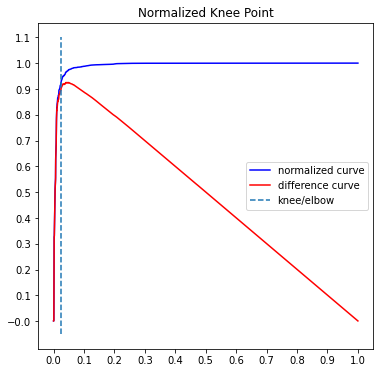

In [ ]:
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,  # y values
    S=1,  # parameter suggested from paper
    curve="convex",  # parameter from figure
    direction="decreasing",
)  # parameter from figure
kneedle.plot_knee_normalized()
eps = round(kneedle.knee_y)
print(eps)

In [ ]:
core, noise, border, labelled, clusters = DBSCAN(
    le_X_train004.to_numpy(), eps, 1, fname="label_encoded"
)

In [ ]:
print(f"noise indices: {noise}")
print(f"number of clusters: {clusters}")
print(f"Labels: {labelled}")

noise indices: []
number of clusters: 9
Labels: [1. 1. 1. ... 1. 1. 1.]


Attempt to decrease eps, to increase the numbers of clusters to closer to 11 (the number of labels, i.e. the real number of clusters)

In [ ]:
print(len(np.unique(le_y_train004)))

11


In [ ]:
core, noise, border, labelled, clusters = DBSCAN(
    le_X_train004.to_numpy(), 2550, 1, fname="label_encoded"
)

In [ ]:
print(f"noise indices: {noise}")
print(f"number of clusters: {clusters}")
print(f"Labels: {labelled}")

noise indices: []
number of clusters: 11
Labels: [1. 1. 1. ... 1. 1. 1.]


### one-hot encoded run

In [ ]:
min_pts = le_X_train004.shape[1] * 2
nbrs = NearestNeighbors(n_neighbors=min_pts).fit(oe_X_train004.to_numpy())
distances, indices = nbrs.kneighbors(oe_X_train004.to_numpy())
distance_desc = sorted(distances[:, min_pts - 1], reverse=True)[7:]
px.line(x=list(range(1, len(distance_desc) + 1)), y=distance_desc)

3561


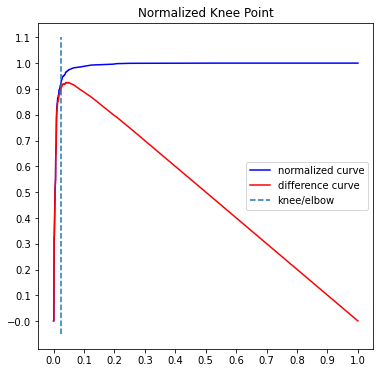

In [ ]:
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,  # y values
    S=1,  # parameter suggested from paper
    curve="convex",  # parameter from figure
    direction="decreasing",
)  # parameter from figure
kneedle.plot_knee_normalized()
eps = round(kneedle.knee_y)
print(eps)

In [ ]:
core, noise, border, labelled, clusters = DBSCAN(
    oe_X_train004.to_numpy(), eps, 1, fname="one-hot_encoded"
)

In [ ]:
print(f"noise indices: {noise}")
print(f"number of clusters: {clusters}")
print(f"Labels: {labelled}")

noise indices: []
number of clusters: 9
Labels: [1. 1. 1. ... 1. 1. 1.]


Attempt to decrease eps, to increase the numbers of clusters to closer to 11 (the number of labels, i.e. the real number of clusters)

In [ ]:
print(len(np.unique(le_y_train004)))

11


In [ ]:
core, noise, border, labelled, clusters = DBSCAN(
    oe_X_train004.to_numpy(), 2550, 1, fname="one-hot_encoded"
)

In [ ]:
print(f"noise indices: {noise}")
print(f"number of clusters: {clusters}")
print(f"Labels: {labelled}")

noise indices: []
number of clusters: 11
Labels: [1. 1. 1. ... 1. 1. 1.]


# Evaluation

## Conditional entropy

In [ ]:
def conditional_entropy(y_true, y_pred):
    n = len(y_true)
    y_true_labels = np.unique(y_true)
    y_pred_labels = np.unique(y_pred)
    # Calculate H(T|C)
    H_T_C_total = 0
    for pred_label in y_pred_labels:
        indices = np.where(y_pred == pred_label)[0]
        cluster = y_true[indices]
        H_T_C = 0
        for true_label in y_true_labels:
            p = np.mean(cluster == true_label)
            if p > 0:
                H_T_C -= p * np.log2(p)
        H_T_C_total += len(cluster) * H_T_C / n
    return H_T_C_total

## Precision, Recall, F1 score

In [ ]:
def precision_recall_f1_weighted(y_true, y_pred):
    # Compute F1 score with average=weighted
    n_classes = len(set(y_true))
    precisions = []
    recalls = []
    f1_scores = []
    for c in range(n_classes):
        weight = np.sum(y_true == c) / len(y_true)
        tp = np.sum((y_true == c) & (y_pred == c))
        fp = np.sum((y_true != c) & (y_pred == c))
        fn = np.sum((y_true == c) & (y_pred != c))
        precision = weight * tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = weight * tp / (tp + fn) if (tp + fn) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(
            2 * precision * recall / (precision + recall)
            if (precision + recall) > 0
            else 0
        )
    print("Weighted:")
    print(f"Precision: {sum(precisions) }")
    print(f"Recall: {sum(recalls)}")
    print(f"F1 score: {sum(f1_scores)}")
    return sum(precisions), sum(recalls), sum(f1_scores)

## Plotting Values

In [ ]:
def plot_conditional_entropy_precision_recall_f1(
    cond_entropies, precisions, recalls, f1_scores, x_axis, name
):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 6)
    plt.rcParams.update({"font.size": 10})
    fig.suptitle(name)
    ax1.plot(x_axis, cond_entropies)
    ax1.set_xlabel("number of clusters")
    ax1.set_ylabel("conditional entropy")
    ax2.plot(x_axis, precisions, label="precision")
    ax2.plot(x_axis, recalls, label="recall")
    ax2.plot(x_axis, f1_scores, label="f1_score")
    ax2.set_xlabel("number of clusters")
    ax2.set_ylabel("score")
    ax2.legend()
    plt.show()

## Maximum matching

In [ ]:
def max_matching_hungarian(labels, ground_truth):
    n_labels = len(np.unique(labels))
    n_ground_truth = len(np.unique(ground_truth))
    cost_matrix = np.zeros((n_labels, n_ground_truth))
    for i in range(n_labels):
        for j in range(n_ground_truth):
            cost_matrix[i, j] = np.sum((labels == i) & (ground_truth == j))
    padded = np.zeros(2 * [max(cost_matrix.shape)])
    padded[0 : cost_matrix.shape[0], 0 : cost_matrix.shape[1]] = cost_matrix
    cost_matrix = padded
    row_ind, col_ind = linear_sum_assignment(cost_matrix, maximize=True)
    new_labels = np.zeros_like(labels)
    for i in range(len(row_ind)):
        new_labels[labels == row_ind[i]] = col_ind[i]
    print(f"Accuracy: {accuracy_score(ground_truth, new_labels)}")
    return new_labels

## Purity matching

In [ ]:
def purity_matching(y_true, y_pred):
    # get the unique classes
    max_count = max(len(np.unique(y_true)), len(np.unique(y_pred)))
    max_value = np.max(np.unique(y_true))
    potential_labels = set([*range(max_value + 1, max_value + max_count)])
    clusters = np.unique(y_pred)
    # create a dictionary to store the mapping
    mapping = {}
    mapped = []
    # loop through the classes
    for c in clusters:
        # get the index of the class
        idx = np.where(y_pred == c)
        # get the most common label in the predicted labels
        sorted = np.argsort(np.bincount(y_true[idx])).tolist()
        for label in mapped:
            if label in sorted:
                sorted.remove(label)
        if len(sorted) == 0:
            label = potential_labels.pop()
        else:
            label = sorted[-1]
        # map the class to the label
        mapping[c] = label
        mapped.append(label)
    # create a new list of labels
    for i in range(len(y_pred)):
        y_pred[i] = mapping[y_pred[i]]
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    return y_pred

## Labels and Centroids loading functions

In [ ]:
def load_kmeans_labels(k=23, fname="label_encoded_kmeans"):
    path = "/content/drive/My Drive/pattern/2/"
    files = os.listdir(path)
    files = [file for file in files if file.startswith("labels")]
    candidates = []
    for file in files:
        # regex to get the file which will look like labels_{iter}_{k}_{fname}.csv
        if re.search(f"labels_[0-9]+_{k}_{fname}.csv", file):
            candidates.append(file)
    # get the file with max iter
    candidates.sort(key=lambda x: int(x.split("_")[1]))
    print(f"Loading: {candidates[-1]}")
    labels = pd.read_csv(path + candidates[-1], index_col=0)
    return labels

In [ ]:
def load_kmeans_centroids(k=23, fname="spectral_clustering"):
    path = "/content/drive/My Drive/pattern/2/"
    files = os.listdir(path)
    files = [file for file in files if file.startswith("centroids")]
    candidates = []
    for file in files:
        # regex to get the file which will look like labels_{iter}_{k}_{fname}.csv
        if re.search(f"centroids_[0-9]+_{k}_{fname}.csv", file):
            candidates.append(file)
    # get the file with max iter
    candidates.sort(key=lambda x: int(x.split("_")[1]))
    print(candidates[-1])
    centroids = pd.read_csv(path + candidates[-1], index_col=0)
    return centroids

In [ ]:
def load_dbscan_labels(fname=""):
    path = "/content/drive/My Drive/pattern/2/"
    files = os.listdir(path)
    files = [file for file in files if file.startswith("labels")]
    candidates = []
    for file in files:
        # regex to get the file which will look like labels_{fname}_DBSCAN.csv
        if re.search(f"labels_{fname}_DBSCAN.csv", file):
            candidates.append(file)
    # get the file with max iter
    candidates.sort(key=lambda x: int(x.split("_")[1]))
    print(f"Loading: {candidates[-1]}")
    labels = pd.read_csv(path + candidates[-1], index_col=0)
    return labels

## KMeans

### Using test data

#### Maximum matching

##### label encoded

In [ ]:
precision_label_encoded_kmean_test = []
recall_label_encoded_kmean_test = []
f1_label_encoded_kmean_test = []
con_entr_label_encoded_kmean_test = []

In [ ]:
clusters = [7, 15, 23, 31, 45]
for k in clusters:
    centroids = load_kmeans_centroids(k=k, fname="label_encoded_kmeans")
    centroids = centroids.to_numpy()
    labels = np.array(k_means_predict(le_test.to_numpy(), centroids)).astype(np.int64)
    print(f"k= {k}")
    new_labels = max_matching_hungarian(labels, le_y_test)
    prec, recall, f1 = precision_recall_f1_weighted(le_y_test, new_labels)
    precision_label_encoded_kmean_test.append(prec)
    recall_label_encoded_kmean_test.append(recall)
    f1_label_encoded_kmean_test.append(f1)
    con_entr = conditional_entropy(le_y_test, new_labels)
    con_entr_label_encoded_kmean_test.append(con_entr)
    print(f"Conditional entropy: {con_entr}")

centroids_9_7_label_encoded_kmeans.csv
k= 7
Accuracy: 0.5276163958987747
Weighted:
Precision: 0.47319717186600935
Recall: 0.5276163958987747
F1 score: 0.36452223064423
Conditional entropy: 2.0070435581419477
centroids_11_15_label_encoded_kmeans.csv
k= 15
Accuracy: 0.5333296895144826
Weighted:
Precision: 0.4817797139950501
Recall: 0.5333296895144826
F1 score: 0.37852807223197243
Conditional entropy: 1.9009496043577163
centroids_11_23_label_encoded_kmeans.csv
k= 23
Accuracy: 0.5761906446022718
Weighted:
Precision: 0.4992798123251458
Recall: 0.5761906446022718
F1 score: 0.46045814279959163
Conditional entropy: 1.76246569098425
centroids_11_31_label_encoded_kmeans.csv
k= 31
Accuracy: 0.7625462577444547
Weighted:
Precision: 0.8020043115539865
Recall: 0.7625462577444547
F1 score: 0.7192353472061755
Conditional entropy: 0.902351889216086
centroids_11_45_label_encoded_kmeans.csv
k= 45
Accuracy: 0.7624240826418115
Weighted:
Precision: 0.8104041422814647
Recall: 0.7624240826418116
F1 score: 0.72

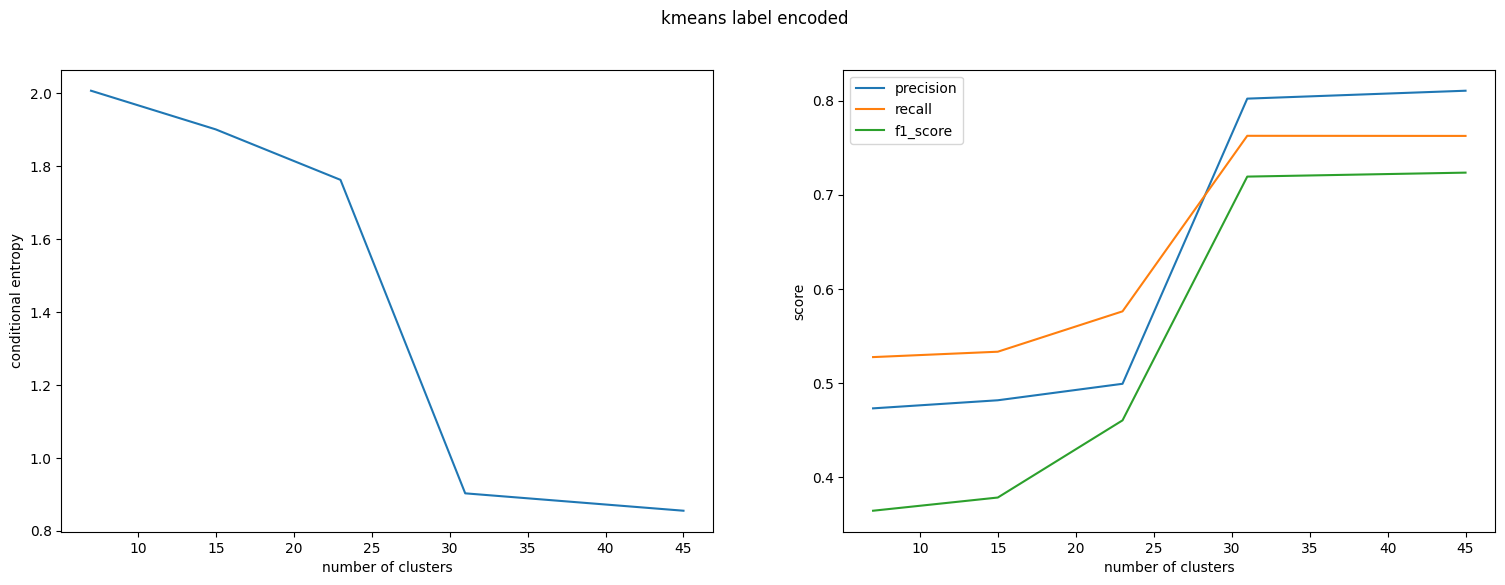

In [ ]:
plot_conditional_entropy_precision_recall_f1(
    con_entr_label_encoded_kmean_test,
    precision_label_encoded_kmean_test,
    recall_label_encoded_kmean_test,
    f1_label_encoded_kmean_test,
    clusters,
    "kmeans label encoded",
)

##### one-hot encoded

In [ ]:
precision_one_hot_encoded_kmean_test = []
recall_one_hot_encoded_kmean_test = []
f1_one_hot_encoded_kmean_test = []
con_entr_one_hot_encoded_kmean_test = []

In [ ]:
clusters = [7, 15, 23, 31, 45]
for k in clusters:
    centroids = load_kmeans_centroids(k=k, fname="one-hot_encoded_kmeans")
    centroids = centroids.to_numpy()
    labels = np.array(k_means_predict(oe_test.to_numpy(), centroids)).astype(np.int64)
    print(f"k= {k}")
    new_labels = max_matching_hungarian(labels, le_y_test)
    prec, recall, f1 = precision_recall_f1_weighted(le_y_test, new_labels)
    precision_one_hot_encoded_kmean_test.append(prec)
    recall_one_hot_encoded_kmean_test.append(recall)
    f1_one_hot_encoded_kmean_test.append(f1)
    con_entr = conditional_entropy(le_y_test, new_labels)
    con_entr_one_hot_encoded_kmean_test.append(con_entr)
    print(f"Conditional entropy: {con_entr}")

centroids_9_7_one-hot_encoded_kmeans.csv
k= 7
Accuracy: 0.5276163958987747
Weighted:
Precision: 0.47319717186600935
Recall: 0.5276163958987747
F1 score: 0.36452223064423
Conditional entropy: 2.0070435581419477
centroids_11_15_one-hot_encoded_kmeans.csv
k= 15
Accuracy: 0.5333296895144826
Weighted:
Precision: 0.4817797139950501
Recall: 0.5333296895144826
F1 score: 0.37852807223197243
Conditional entropy: 1.9009496043577163
centroids_11_23_one-hot_encoded_kmeans.csv
k= 23
Accuracy: 0.578245115407245
Weighted:
Precision: 0.500174839756438
Recall: 0.578245115407245
F1 score: 0.46385112099050596
Conditional entropy: 1.7545007116440827
centroids_11_31_one-hot_encoded_kmeans.csv
k= 31
Accuracy: 0.7616846017573924
Weighted:
Precision: 0.8028689770844921
Recall: 0.7616846017573925
F1 score: 0.716368351473006
Conditional entropy: 0.9033757482008209
centroids_11_45_one-hot_encoded_kmeans.csv
k= 45
Accuracy: 0.7620993540795231
Weighted:
Precision: 0.81008831658732
Recall: 0.7620993540795231
F1 scor

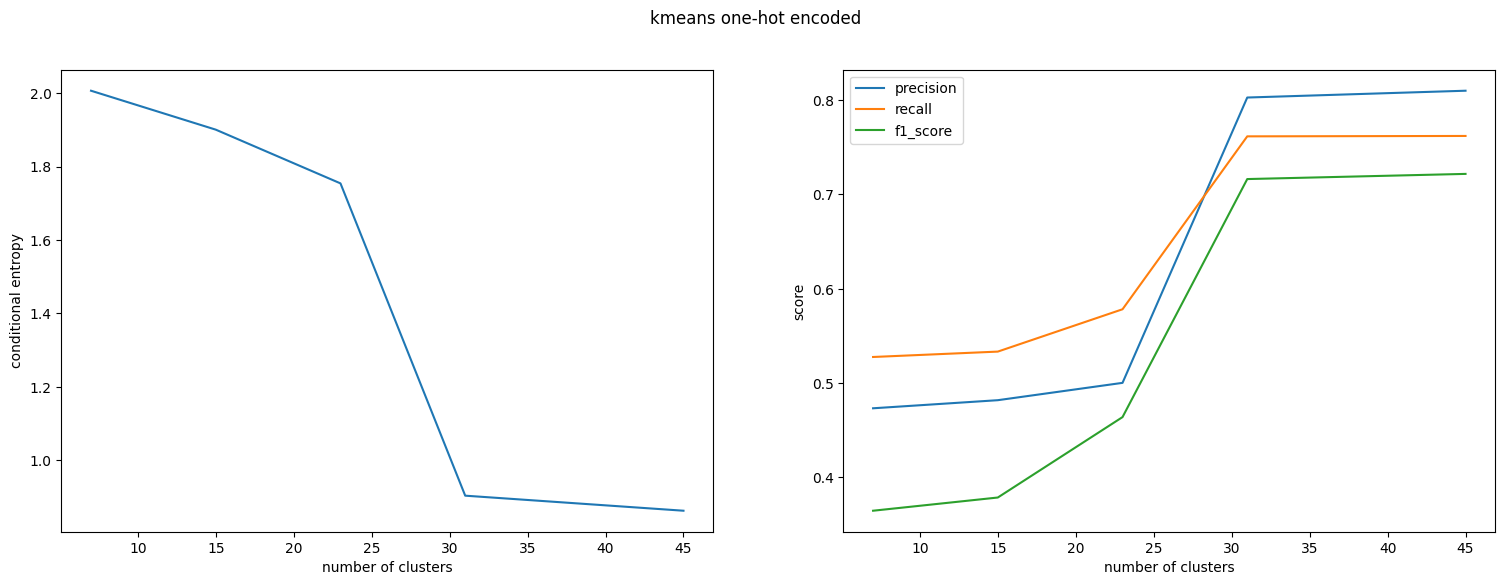

In [ ]:
plot_conditional_entropy_precision_recall_f1(
    con_entr_one_hot_encoded_kmean_test,
    precision_one_hot_encoded_kmean_test,
    recall_one_hot_encoded_kmean_test,
    f1_one_hot_encoded_kmean_test,
    clusters,
    "kmeans one-hot encoded",
)

#### Purity matching

##### label encoded

In [ ]:
precision_label_encoded_kmean_test = []
recall_label_encoded_kmean_test = []
f1_label_encoded_kmean_test = []
con_entr_label_encoded_kmean_test = []

In [ ]:
clusters = [7, 15, 23, 31, 45]
for k in clusters:
    centroids = load_kmeans_centroids(k=k, fname="label_encoded_kmeans")
    centroids = centroids.to_numpy()
    labels = np.array(k_means_predict(le_test.to_numpy(), centroids)).astype(np.int64)
    print(f"k= {k}")
    new_labels = purity_matching(le_y_test, labels)
    prec, recall, f1 = precision_recall_f1_weighted(le_y_test, new_labels)
    precision_label_encoded_kmean_test.append(prec)
    recall_label_encoded_kmean_test.append(recall)
    f1_label_encoded_kmean_test.append(f1)
    con_entr = conditional_entropy(le_y_test, new_labels)
    con_entr_label_encoded_kmean_test.append(con_entr)
    print(f"Conditional entropy: {con_entr}")

centroids_9_7_label_encoded_kmeans.csv
k= 7
Accuracy: 0.527587459690254
Weighted:
Precision: 0.47320020838171833
Recall: 0.527587459690254
F1 score: 0.36446106396427613
Conditional entropy: 2.0070435581419477
centroids_11_15_label_encoded_kmeans.csv
k= 15
Accuracy: 0.5293172019329387
Weighted:
Precision: 0.48309122521286463
Recall: 0.5293172019329387
F1 score: 0.37323147599919504
Conditional entropy: 1.9009496043577163
centroids_11_23_label_encoded_kmeans.csv
k= 23
Accuracy: 0.5294007954242209
Weighted:
Precision: 0.49918108687329216
Recall: 0.5294007954242209
F1 score: 0.38647268034960175
Conditional entropy: 1.76246569098425
centroids_11_31_label_encoded_kmeans.csv
k= 31
Accuracy: 0.7171646373810803
Weighted:
Precision: 0.8009624599703624
Recall: 0.7171646373810802
F1 score: 0.6464864518930077
Conditional entropy: 0.902351889216086
centroids_11_45_label_encoded_kmeans.csv
k= 45
Accuracy: 0.717119625501159
Weighted:
Precision: 0.8047199416082651
Recall: 0.717119625501159
F1 score: 0.6

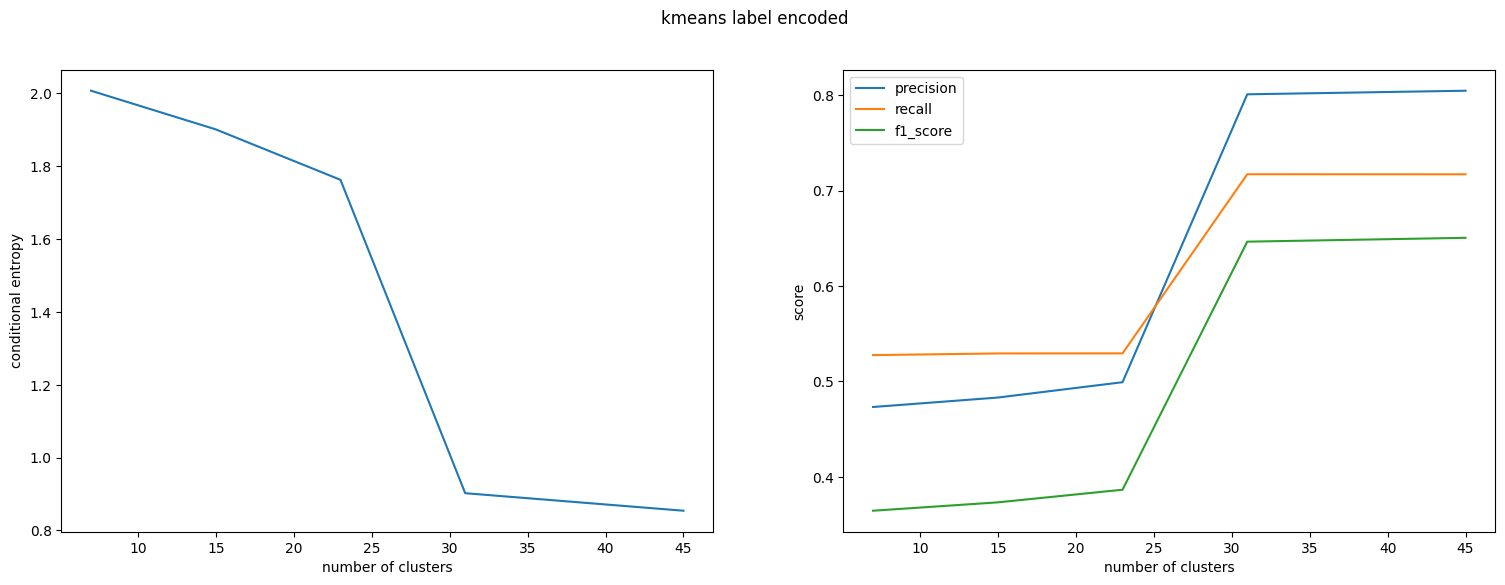

In [ ]:
plot_conditional_entropy_precision_recall_f1(
    con_entr_label_encoded_kmean_test,
    precision_label_encoded_kmean_test,
    recall_label_encoded_kmean_test,
    f1_label_encoded_kmean_test,
    clusters,
    "kmeans label encoded",
)

##### one-hot encoded

In [ ]:
precision_one_hot_encoded_kmean_test = []
recall_one_hot_encoded_kmean_test = []
f1_one_hot_encoded_kmean_test = []
con_entr_one_hot_encoded_kmean_test = []

In [ ]:
clusters = [7, 15, 23, 31, 45]
for k in clusters:
    centroids = load_kmeans_centroids(k=k, fname="one-hot_encoded_kmeans")
    centroids = centroids.to_numpy()
    labels = np.array(k_means_predict(oe_test.to_numpy(), centroids)).astype(np.int64)
    print(f"k= {k}")
    new_labels = purity_matching(le_y_test, labels)
    prec, recall, f1 = precision_recall_f1_weighted(le_y_test, new_labels)
    precision_one_hot_encoded_kmean_test.append(prec)
    recall_one_hot_encoded_kmean_test.append(recall)
    f1_one_hot_encoded_kmean_test.append(f1)
    con_entr = conditional_entropy(le_y_test, new_labels)
    con_entr_one_hot_encoded_kmean_test.append(con_entr)
    print(f"Conditional entropy: {con_entr}")

centroids_9_7_one-hot_encoded_kmeans.csv
k= 7
Accuracy: 0.527587459690254
Weighted:
Precision: 0.47320020838171833
Recall: 0.527587459690254
F1 score: 0.36446106396427613
Conditional entropy: 2.0070435581419477
centroids_11_15_one-hot_encoded_kmeans.csv
k= 15
Accuracy: 0.5293172019329387
Weighted:
Precision: 0.48309122521286463
Recall: 0.5293172019329387
F1 score: 0.37323147599919504
Conditional entropy: 1.9009496043577163
centroids_11_23_one-hot_encoded_kmeans.csv
k= 23
Accuracy: 0.5291628754874947
Weighted:
Precision: 0.49914064112653816
Recall: 0.5291628754874946
F1 score: 0.38620430665312133
Conditional entropy: 1.7545007116440827
centroids_11_31_one-hot_encoded_kmeans.csv
k= 31
Accuracy: 0.7165183953907835
Weighted:
Precision: 0.7964567934807149
Recall: 0.7165183953907835
F1 score: 0.6434367268723267
Conditional entropy: 0.9033757482008209
centroids_11_45_one-hot_encoded_kmeans.csv
k= 45
Accuracy: 0.7208234601918149
Weighted:
Precision: 0.8104277459463206
Recall: 0.720823460191814

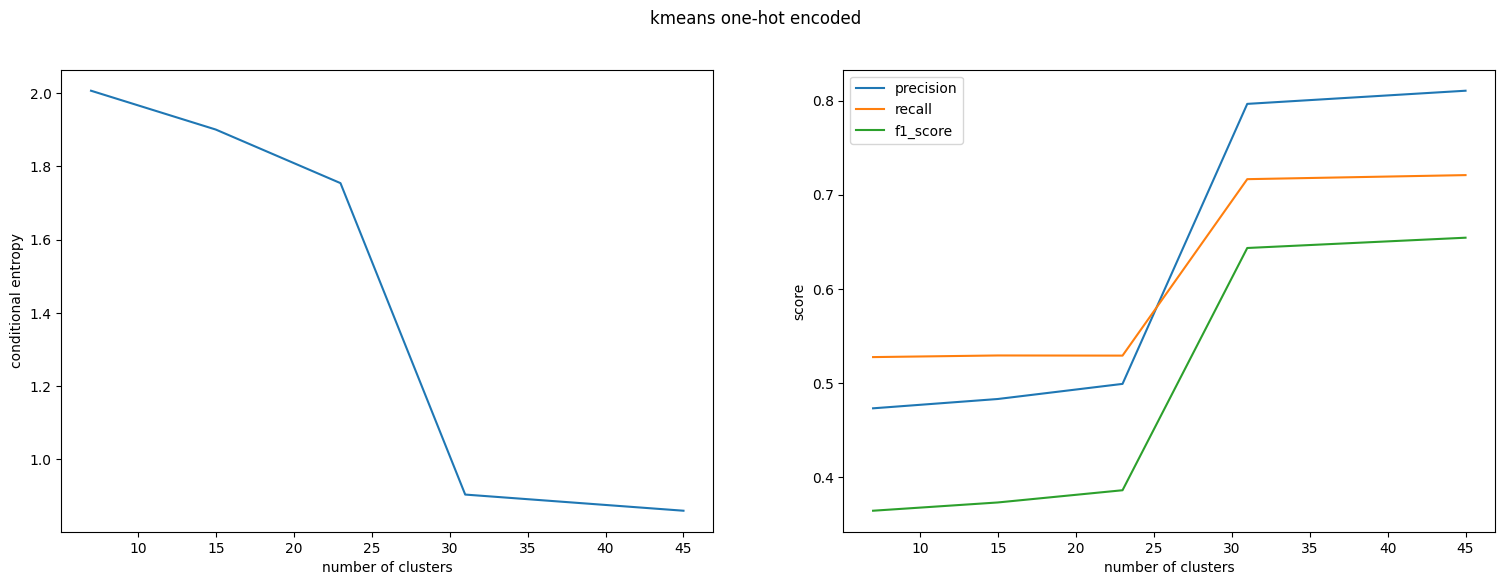

In [ ]:
plot_conditional_entropy_precision_recall_f1(
    con_entr_one_hot_encoded_kmean_test,
    precision_one_hot_encoded_kmean_test,
    recall_one_hot_encoded_kmean_test,
    f1_one_hot_encoded_kmean_test,
    clusters,
    "kmeans one-hot encoded",
)

### Using training data

#### Maximum matching

##### label encoded

In [ ]:
precision_label_encoded_kmean_train = []
recall_label_encoded_kmean_train = []
f1_label_encoded_kmean_train = []
con_entr_label_encoded_kmean_train = []

In [ ]:
clusters = [7, 15, 23, 31, 45]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(k=k, fname="label_encoded_kmeans")
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train_10_percent)
    prec, recall, f1 = precision_recall_f1_weighted(le_y_train_10_percent, new_labels)
    precision_label_encoded_kmean_train.append(prec)
    recall_label_encoded_kmean_train.append(recall)
    f1_label_encoded_kmean_train.append(f1)
    con_entr = conditional_entropy(le_y_train_10_percent, new_labels)
    con_entr_label_encoded_kmean_train.append(con_entr)
    print(f"Conditional entropy: {con_entr}")

k= 7
Loading: labels_9_7_label_encoded_kmeans.csv
Accuracy: 0.5686074073774192
Weighted:
Precision: 0.5059549714702325
Recall: 0.5686074073774191
F1 score: 0.4124629551498325
Conditional entropy: 1.555616299708753
k= 15
Loading: labels_11_15_label_encoded_kmeans.csv
Accuracy: 0.5909505871207904
Weighted:
Precision: 0.5361831284498593
Recall: 0.5909505871207904
F1 score: 0.4561441952183603
Conditional entropy: 1.4677963604890603
k= 23
Loading: labels_11_23_label_encoded_kmeans.csv
Accuracy: 0.6134476064782671
Weighted:
Precision: 0.5512803173254756
Recall: 0.6134476064782671
F1 score: 0.504100225908116
Conditional entropy: 1.3363884292614905
k= 31
Loading: labels_11_31_label_encoded_kmeans.csv
Accuracy: 0.8330313893538939
Weighted:
Precision: 0.8944603993883612
Recall: 0.8330313893538938
F1 score: 0.8062192971874526
Conditional entropy: 0.5294019358718293
k= 45
Loading: labels_11_45_label_encoded_kmeans.csv
Accuracy: 0.8307703518676332
Weighted:
Precision: 0.9054694984696837
Recall: 0.8

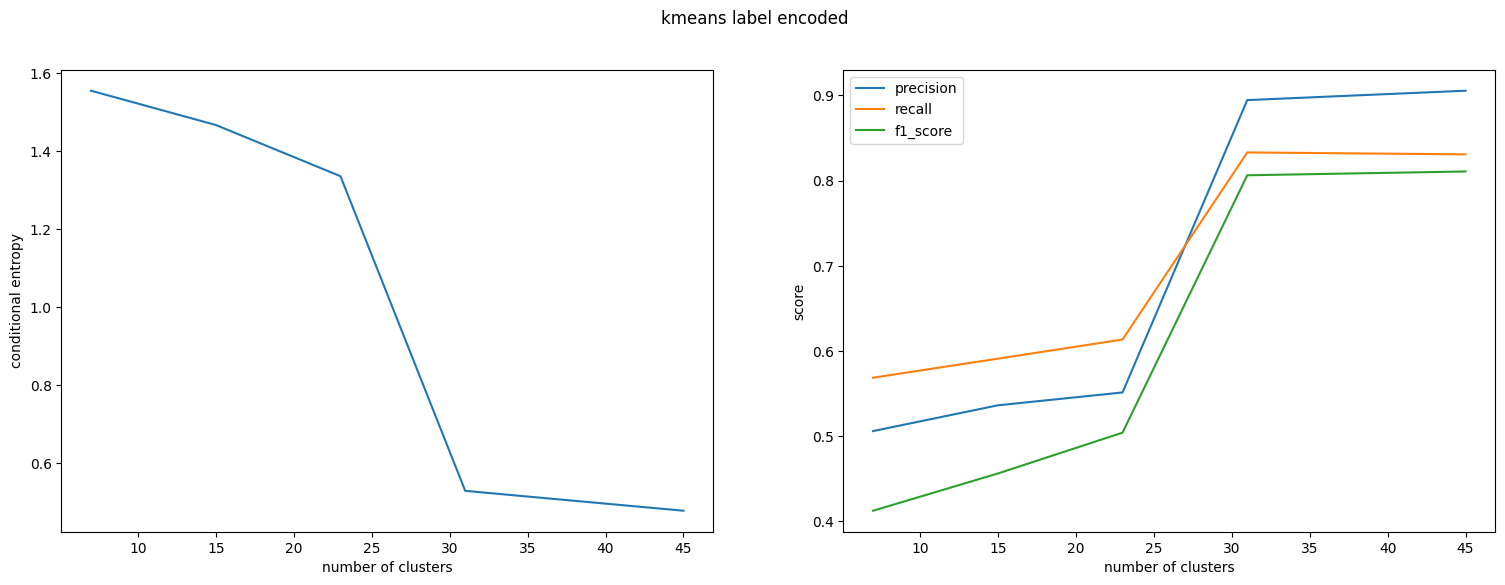

In [ ]:
plot_conditional_entropy_precision_recall_f1(
    con_entr_label_encoded_kmean_train,
    precision_label_encoded_kmean_train,
    recall_label_encoded_kmean_train,
    f1_label_encoded_kmean_train,
    clusters,
    "kmeans label encoded",
)

##### one-hot encoded

In [ ]:
precision_one_hot_encoded_kmean_train = []
recall_one_hot_encoded_kmean_train = []
f1_one_hot_encoded_kmean_train = []
con_entr_one_hot_encoded_kmean_train = []

In [ ]:
clusters = [7, 15, 23, 31, 45]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(k=k, fname="one-hot_encoded_kmeans")
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train_10_percent)
    prec, recall, f1 = precision_recall_f1_weighted(le_y_train_10_percent, new_labels)
    precision_one_hot_encoded_kmean_train.append(prec)
    recall_one_hot_encoded_kmean_train.append(recall)
    f1_one_hot_encoded_kmean_train.append(f1)
    con_entr = conditional_entropy(le_y_train_10_percent, new_labels)
    con_entr_one_hot_encoded_kmean_train.append(con_entr)
    print(f"Conditional entropy: {con_entr}")

k= 7
Loading: labels_9_7_one-hot_encoded_kmeans.csv
Accuracy: 0.5686074073774192
Weighted:
Precision: 0.5059549714702325
Recall: 0.5686074073774191
F1 score: 0.4124629551498325
Conditional entropy: 1.555616299708753
k= 15
Loading: labels_11_15_one-hot_encoded_kmeans.csv
Accuracy: 0.5909505871207904
Weighted:
Precision: 0.5361831284498593
Recall: 0.5909505871207904
F1 score: 0.4561441952183603
Conditional entropy: 1.4677963604890603
k= 23
Loading: labels_11_23_one-hot_encoded_kmeans.csv
Accuracy: 0.6175607919501398
Weighted:
Precision: 0.5514688631684094
Recall: 0.6175607919501397
F1 score: 0.5095895101013227
Conditional entropy: 1.3370603934626917
k= 31
Loading: labels_11_31_one-hot_encoded_kmeans.csv
Accuracy: 0.828845332485866
Weighted:
Precision: 0.8891547705865438
Recall: 0.828845332485866
F1 score: 0.7976041471956613
Conditional entropy: 0.5373994436677895
k= 45
Loading: labels_11_45_one-hot_encoded_kmeans.csv
Accuracy: 0.8297967090467814
Weighted:
Precision: 0.9016778000150121
Re

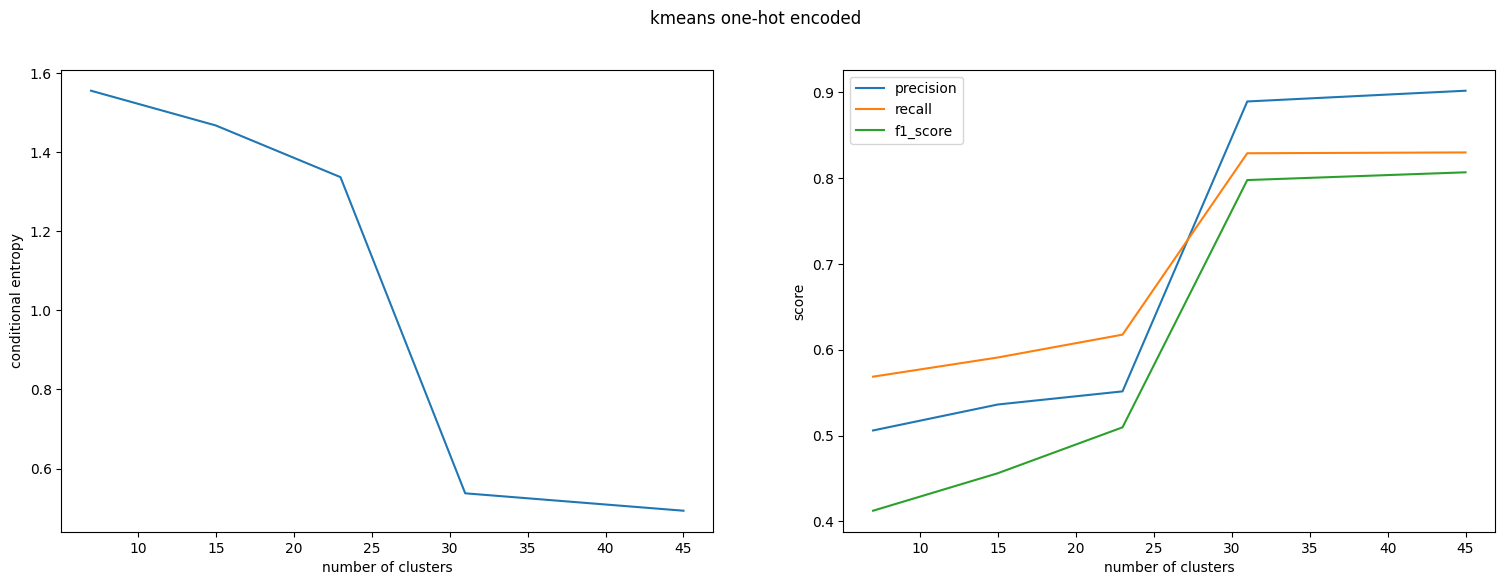

In [ ]:
plot_conditional_entropy_precision_recall_f1(
    con_entr_one_hot_encoded_kmean_train,
    precision_one_hot_encoded_kmean_train,
    recall_one_hot_encoded_kmean_train,
    f1_one_hot_encoded_kmean_train,
    clusters,
    "kmeans one-hot encoded",
)

#### Purity matching

##### label encoded

In [ ]:
precision_label_encoded_kmean_train = []
recall_label_encoded_kmean_train = []
f1_label_encoded_kmean_train = []
con_entr_label_encoded_kmean_train = []

In [ ]:
clusters = [7, 15, 23, 31, 45]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(k=k, fname="label_encoded_kmeans")
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train_10_percent, labels)
    prec, recall, f1 = precision_recall_f1_weighted(le_y_train_10_percent, new_labels)
    precision_label_encoded_kmean_train.append(prec)
    recall_label_encoded_kmean_train.append(recall)
    f1_label_encoded_kmean_train.append(f1)
    con_entr = conditional_entropy(le_y_train_10_percent, new_labels)
    con_entr_label_encoded_kmean_train.append(con_entr)
    print(f"Conditional entropy: {con_entr}")

k= 7
Loading: labels_9_7_label_encoded_kmeans.csv
Accuracy: 0.5685790685011366
Weighted:
Precision: 0.5160682902572175
Recall: 0.5685790685011365
F1 score: 0.41239936092439017
Conditional entropy: 1.555616299708753
k= 15
Loading: labels_11_15_label_encoded_kmeans.csv
Accuracy: 0.5730221994611565
Weighted:
Precision: 0.5284208184267467
Recall: 0.5730221994611564
F1 score: 0.42328718311489655
Conditional entropy: 1.4677963604890603
k= 23
Loading: labels_11_23_label_encoded_kmeans.csv
Accuracy: 0.5729918363794252
Weighted:
Precision: 0.5544586055706119
Recall: 0.5729918363794251
F1 score: 0.43716685746181705
Conditional entropy: 1.3363884292614905
k= 31
Loading: labels_11_31_label_encoded_kmeans.csv
Accuracy: 0.7899360553498738
Weighted:
Precision: 0.8973673323059633
Recall: 0.7899360553498738
F1 score: 0.7357341141522582
Conditional entropy: 0.5294019358718293
k= 45
Loading: labels_11_45_label_encoded_kmeans.csv
Accuracy: 0.7899320069389762
Weighted:
Precision: 0.9093927020462017
Recall:

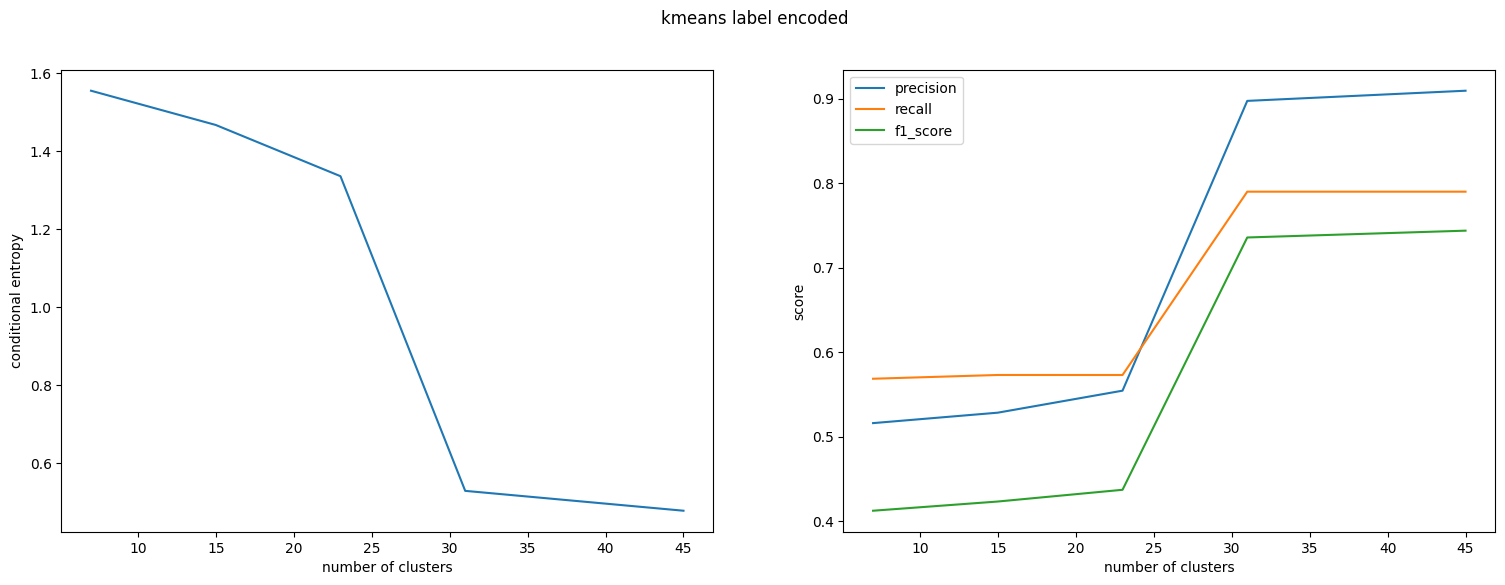

In [ ]:
plot_conditional_entropy_precision_recall_f1(
    con_entr_label_encoded_kmean_train,
    precision_label_encoded_kmean_train,
    recall_label_encoded_kmean_train,
    f1_label_encoded_kmean_train,
    clusters,
    "kmeans label encoded",
)

##### one-hot encoded

In [ ]:
precision_one_hot_encoded_kmean_train = []
recall_one_hot_encoded_kmean_train = []
f1_one_hot_encoded_kmean_train = []
con_entr_one_hot_encoded_kmean_train = []

In [ ]:
clusters = [7, 15, 23, 31, 45]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(k=k, fname="one-hot_encoded_kmeans")
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train_10_percent, labels)
    prec, recall, f1 = precision_recall_f1_weighted(le_y_train_10_percent, new_labels)
    precision_one_hot_encoded_kmean_train.append(prec)
    recall_one_hot_encoded_kmean_train.append(recall)
    f1_one_hot_encoded_kmean_train.append(f1)
    con_entr = conditional_entropy(le_y_train_10_percent, new_labels)
    con_entr_one_hot_encoded_kmean_train.append(con_entr)
    print(f"Conditional entropy: {con_entr}")

k= 7
Loading: labels_9_7_one-hot_encoded_kmeans.csv
Accuracy: 0.5685790685011366
Weighted:
Precision: 0.5160682902572175
Recall: 0.5685790685011365
F1 score: 0.41239936092439017
Conditional entropy: 1.555616299708753
k= 15
Loading: labels_11_15_one-hot_encoded_kmeans.csv
Accuracy: 0.5730221994611565
Weighted:
Precision: 0.5284208184267467
Recall: 0.5730221994611564
F1 score: 0.42328718311489655
Conditional entropy: 1.4677963604890603
k= 23
Loading: labels_11_23_one-hot_encoded_kmeans.csv
Accuracy: 0.5729938605848739
Weighted:
Precision: 0.5543930698412595
Recall: 0.5729938605848739
F1 score: 0.4371092179436616
Conditional entropy: 1.3370603934626917
k= 31
Loading: labels_11_31_one-hot_encoded_kmeans.csv
Accuracy: 0.2221342817410596
Weighted:
Precision: 0.34357635038690015
Recall: 0.22213428174105962
F1 score: 0.17347837751031353
Conditional entropy: 0.5373994436677894
k= 45
Loading: labels_11_45_one-hot_encoded_kmeans.csv
Accuracy: 0.2221201123029183
Weighted:
Precision: 0.355406084916

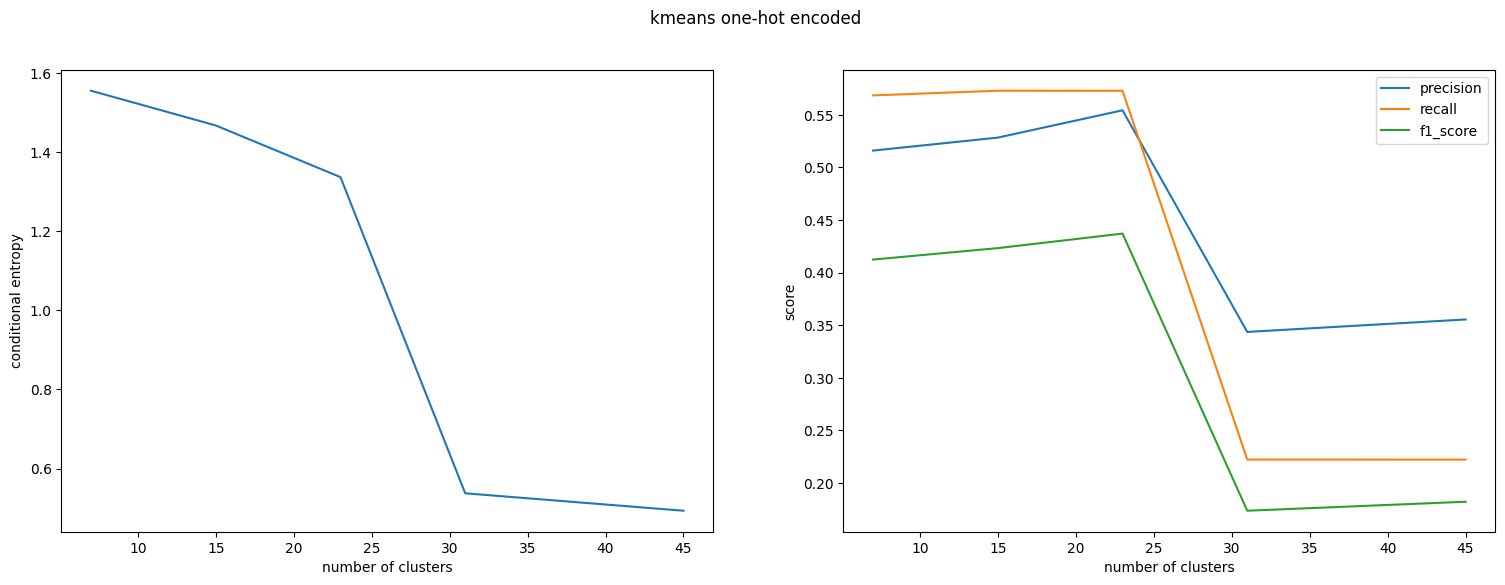

In [ ]:
plot_conditional_entropy_precision_recall_f1(
    con_entr_one_hot_encoded_kmean_train,
    precision_one_hot_encoded_kmean_train,
    recall_one_hot_encoded_kmean_train,
    f1_one_hot_encoded_kmean_train,
    clusters,
    "kmeans one-hot encoded",
)

### Comment
The difference between using label and one-hot encoding is trivial and they appear to produce approximately the same results.

Test data: Maximum matching yields better F1-score results than purity with a maximum of 0.723 for Maximum matching vs Purity matching's 0.654 for the testing data. 

Training data: Maximum matching yields better F1-score results than purity with a maximum of 0.811 for Maximum matching vs Purity matching's 0.744 for the training data. 

After a certain point, precision has the highest value of all the scores.

Conditional entropy is slightly improved by the use of label encoding for both training and testing data.

Training data evaluation shows overall better results, this may be due to the additional classes present in the testing data.

## Spectral Clustering

### Maximum matching

#### label encoded

##### additive chi2

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_additive_chi2_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_additive_chi2_1.0.csv
Accuracy: 0.5491497975708503
Weighted:
Precision: 0.8767381352860629
Recall: 0.5491497975708503
F1 score: 0.6374081941031435
Conditional entropy: 0.5820853743177853
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_additive_chi2_1.0.csv
Accuracy: 0.5363562753036437
Weighted:
Precision: 0.9235809009260006
Recall: 0.5363562753036437
F1 score: 0.6226551210552266
Conditional entropy: 0.42263953236723323


##### chi2 (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(k=k, fname="label_encoded_spectral_clustering_chi2_1.0")
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_chi2_1.0.csv
Accuracy: 0.3848582995951417
Weighted:
Precision: 0.8315248030996434
Recall: 0.38485829959514173
F1 score: 0.3791162386375192
Conditional entropy: 0.9470902498506792
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_chi2_1.0.csv
Accuracy: 0.374331983805668
Weighted:
Precision: 0.8362056773414028
Recall: 0.37433198380566807
F1 score: 0.3672055851886507
Conditional entropy: 0.9093129020744071


##### cosine similarity

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_cosine_similarity_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_10_15_label_encoded_spectral_clustering_cosine_similarity_1.0.csv
Accuracy: 0.6248582995951417
Weighted:
Precision: 0.9711622706447117
Recall: 0.6248582995951416
F1 score: 0.7349806696003095
Conditional entropy: 0.1380135935608835
k= 23
Loading: labels_12_23_label_encoded_spectral_clustering_cosine_similarity_1.0.csv
Accuracy: 0.39619433198380566
Weighted:
Precision: 0.9737565019705356
Recall: 0.39619433198380566
F1 score: 0.5522230317554143
Conditional entropy: 0.12324804827245744


##### laplacian (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_laplacian_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_laplacian_1.0.csv
Accuracy: 0.27076923076923076
Weighted:
Precision: 0.7405166081551856
Recall: 0.2707692307692308
F1 score: 0.28942773003534544
Conditional entropy: 1.0246564104232805
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_laplacian_1.0.csv
Accuracy: 0.20461538461538462
Weighted:
Precision: 0.3997138576911516
Recall: 0.20461538461538462
F1 score: 0.2680531384387752
Conditional entropy: 0.8885444356751017


##### linear

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_linear_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_linear_1.0.csv
Accuracy: 0.6064777327935222
Weighted:
Precision: 0.9747396517969084
Recall: 0.6064777327935224
F1 score: 0.7046024623279346
Conditional entropy: 0.17849702652699273
k= 23
Loading: labels_20_23_label_encoded_spectral_clustering_linear_1.0.csv
Accuracy: 0.5807287449392713
Weighted:
Precision: 0.9816040958772438
Recall: 0.5807287449392712
F1 score: 0.6760960461018586
Conditional entropy: 0.15520461218506706


##### poly (gamma=1.0 / n_features)

In [ ]:
n_features = le_X_train025.shape[1]
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"label_encoded_spectral_clustering_poly_{1.0 / n_features}"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_15_15_label_encoded_spectral_clustering_poly_0.024390243902439025.csv
Accuracy: 0.6527125506072875
Weighted:
Precision: 0.9832610543549498
Recall: 0.6527125506072875
F1 score: 0.7276710376353052
Conditional entropy: 0.20629991090827574
k= 23
Loading: labels_16_23_label_encoded_spectral_clustering_poly_0.024390243902439025.csv
Accuracy: 0.574412955465587
Weighted:
Precision: 0.9844401551937698
Recall: 0.574412955465587
F1 score: 0.6756018386715089
Conditional entropy: 0.13889966082365454


##### poly (gamma=0.1)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"label_encoded_spectral_clustering_poly_0.1"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_10_15_label_encoded_spectral_clustering_poly_0.1.csv
Accuracy: 0.6496356275303644
Weighted:
Precision: 0.9828892962172853
Recall: 0.6496356275303643
F1 score: 0.7250533180307432
Conditional entropy: 0.13504145816994298
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_poly_0.1.csv
Accuracy: 0.6185425101214574
Weighted:
Precision: 0.9824505231787914
Recall: 0.6185425101214574
F1 score: 0.6853349952123226
Conditional entropy: 0.12787814358439453


##### poly (gamma=0.15)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"label_encoded_spectral_clustering_poly_0.15"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_8_15_label_encoded_spectral_clustering_poly_0.15.csv
Accuracy: 0.6498785425101214
Weighted:
Precision: 0.9836365902102305
Recall: 0.6498785425101216
F1 score: 0.7237627886802386
Conditional entropy: 0.1306486016007698
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_poly_0.15.csv
Accuracy: 0.6364372469635627
Weighted:
Precision: 0.9831107518567752
Recall: 0.6364372469635626
F1 score: 0.7061668745871591
Conditional entropy: 0.12146353446596238


##### rbf (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_rbf_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_rbf_1.0.csv
Accuracy: 0.30955465587044534
Weighted:
Precision: 0.7457384287870625
Recall: 0.3095546558704454
F1 score: 0.31645830386869933
Conditional entropy: 0.8955250817897876
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_rbf_1.0.csv
Accuracy: 0.29724696356275304
Weighted:
Precision: 0.7560056043560033
Recall: 0.2972469635627531
F1 score: 0.2963822076829016
Conditional entropy: 0.892133853382763


##### sigmoid (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_sigmoid_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_16_15_label_encoded_spectral_clustering_sigmoid_1.0.csv
Accuracy: 0.2625910931174089
Weighted:
Precision: 0.4140440493346744
Recall: 0.2625910931174089
F1 score: 0.31957192125738876
Conditional entropy: 1.546599244070808
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_sigmoid_1.0.csv
Accuracy: 0.1986234817813765
Weighted:
Precision: 0.4127001328453496
Recall: 0.19862348178137654
F1 score: 0.2605782173385421
Conditional entropy: 1.543728389893449


#### Comment

The best similarity matrix was cosine similarity, that had the best f1 score (weighted) of 0.73498, with one of the lowest conditional entropy values of 0.13801.

#### one-hot encoded

##### additive chi2

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_additive_chi2_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_17_15_one-hot_encoded_spectral_clustering_additive_chi2_1.0.csv
Accuracy: 0.5638056680161944
Weighted:
Precision: 0.8830318403660401
Recall: 0.5638056680161944
F1 score: 0.6478879133395228
Conditional entropy: 0.5253176595543924
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_additive_chi2_1.0.csv
Accuracy: 0.5305263157894737
Weighted:
Precision: 0.9452439046760479
Recall: 0.5305263157894736
F1 score: 0.6160615000705733
Conditional entropy: 0.36003875947225567


##### chi2 (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(k=k, fname="one-hot_encoded_spectral_clustering_chi2_1.0")
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_19_15_one-hot_encoded_spectral_clustering_chi2_1.0.csv
Accuracy: 0.37587044534412956
Weighted:
Precision: 0.8400786149751478
Recall: 0.3758704453441296
F1 score: 0.37982180033911583
Conditional entropy: 0.8769431602743892
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_chi2_1.0.csv
Accuracy: 0.36898785425101216
Weighted:
Precision: 0.8517834070514931
Recall: 0.36898785425101216
F1 score: 0.37208892282752715
Conditional entropy: 0.8315063932810333


##### cosine similarity

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_cosine_similarity_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_13_15_one-hot_encoded_spectral_clustering_cosine_similarity_1.0.csv
Accuracy: 0.44445344129554654
Weighted:
Precision: 0.9593494500297154
Recall: 0.4444534412955466
F1 score: 0.5990315782412331
Conditional entropy: 0.16599022533969648
k= 23
Loading: labels_17_23_one-hot_encoded_spectral_clustering_cosine_similarity_1.0.csv
Accuracy: 0.3654251012145749
Weighted:
Precision: 0.9593935519163186
Recall: 0.365425101214575
F1 score: 0.5155449619296383
Conditional entropy: 0.1639923786144153


##### laplacian (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_laplacian_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_one-hot_encoded_spectral_clustering_laplacian_1.0.csv
Accuracy: 0.1419433198380567
Weighted:
Precision: 0.6106299421287622
Recall: 0.1419433198380567
F1 score: 0.21948172080180317
Conditional entropy: 1.3372063045871108
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_laplacian_1.0.csv
Accuracy: 0.34307692307692306
Weighted:
Precision: 0.810393175227923
Recall: 0.3430769230769231
F1 score: 0.347203854929599
Conditional entropy: 0.7508464852080923


##### linear

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_linear_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_14_15_one-hot_encoded_spectral_clustering_linear_1.0.csv
Accuracy: 0.5765182186234817
Weighted:
Precision: 0.9555319851246479
Recall: 0.5765182186234817
F1 score: 0.6814423980675436
Conditional entropy: 0.1785731850938518
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_linear_1.0.csv
Accuracy: 0.36145748987854254
Weighted:
Precision: 0.952682065184693
Recall: 0.36145748987854254
F1 score: 0.5064818771645001
Conditional entropy: 0.1325883166649188


##### poly (gamma=1.0 / n_features)

In [ ]:
n_features = oe_X_train025.shape[1]
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"one-hot_encoded_spectral_clustering_poly_{1.0 / n_features}"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_one-hot_encoded_spectral_clustering_poly_0.008403361344537815.csv
Accuracy: 0.628421052631579
Weighted:
Precision: 0.9816596213220036
Recall: 0.628421052631579
F1 score: 0.6983642022329283
Conditional entropy: 0.13784581409333485
k= 23
Loading: labels_14_23_one-hot_encoded_spectral_clustering_poly_0.008403361344537815.csv
Accuracy: 0.6152226720647773
Weighted:
Precision: 0.9693587683052114
Recall: 0.6152226720647772
F1 score: 0.6835397553446224
Conditional entropy: 0.12834203346052694


##### poly (gamma=0.1)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"one-hot_encoded_spectral_clustering_poly_0.1"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_11_15_one-hot_encoded_spectral_clustering_poly_0.1.csv
Accuracy: 0.6391902834008097
Weighted:
Precision: 0.9825841466034744
Recall: 0.6391902834008096
F1 score: 0.7106517493372888
Conditional entropy: 0.1986373163728129
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_poly_0.1.csv
Accuracy: 0.6247773279352227
Weighted:
Precision: 0.9837100948954508
Recall: 0.6247773279352227
F1 score: 0.6937376317753637
Conditional entropy: 0.11999720945584741


##### poly (gamma=0.15)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"one-hot_encoded_spectral_clustering_poly_0.15"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_one-hot_encoded_spectral_clustering_poly_0.15.csv
Accuracy: 0.6452631578947369
Weighted:
Precision: 0.9803960051409684
Recall: 0.6452631578947369
F1 score: 0.7185462722872592
Conditional entropy: 0.13585147538729814
k= 23
Loading: labels_17_23_one-hot_encoded_spectral_clustering_poly_0.15.csv
Accuracy: 0.6162753036437247
Weighted:
Precision: 0.9844234427652382
Recall: 0.6162753036437246
F1 score: 0.681712892089806
Conditional entropy: 0.1106168751926946


##### rbf (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_rbf_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_one-hot_encoded_spectral_clustering_rbf_1.0.csv
Accuracy: 0.33757085020242916
Weighted:
Precision: 0.7874629354998931
Recall: 0.3375708502024292
F1 score: 0.33667316803296027
Conditional entropy: 0.942106738140963
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_rbf_1.0.csv
Accuracy: 0.2623481781376518
Weighted:
Precision: 0.6224187419854702
Recall: 0.2623481781376519
F1 score: 0.36251487395719073
Conditional entropy: 0.79320641322648


##### sigmoid (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_sigmoid_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = max_matching_hungarian(labels, le_y_train025)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_16_15_one-hot_encoded_spectral_clustering_sigmoid_1.0.csv
Accuracy: 0.2625910931174089
Weighted:
Precision: 0.4140440493346744
Recall: 0.2625910931174089
F1 score: 0.31957192125738876
Conditional entropy: 1.546599244070808
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_sigmoid_1.0.csv
Accuracy: 0.1986234817813765
Weighted:
Precision: 0.4127001328453496
Recall: 0.19862348178137654
F1 score: 0.2605782173385421
Conditional entropy: 1.543728389893449


#### Comment

The best similarity matrix was polynomial kernel (gamma=0.15), that had the best f1 score (weighted) of 0.71855, with the lowest conditional entropy of 0.13585.

### Purity matching

#### label encoded

##### additive chi2

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_additive_chi2_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_additive_chi2_1.0.csv
Accuracy: 0.1282591093117409
Weighted:
Precision: 0.8533002852519829
Recall: 0.12825910931174087
F1 score: 0.21272908943506372
Conditional entropy: 0.5820853743177854
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_additive_chi2_1.0.csv
Accuracy: 0.5022672064777328
Weighted:
Precision: 0.7611253663536747
Recall: 0.5022672064777329
F1 score: 0.5728425221543895
Conditional entropy: 0.4226395323672331


##### chi2 (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(k=k, fname="label_encoded_spectral_clustering_chi2_1.0")
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_chi2_1.0.csv
Accuracy: 0.2540890688259109
Weighted:
Precision: 0.693204097307214
Recall: 0.254089068825911
F1 score: 0.2106742493651458
Conditional entropy: 0.947090249850679
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_chi2_1.0.csv
Accuracy: 0.23668016194331984
Weighted:
Precision: 0.711644471665132
Recall: 0.23668016194331984
F1 score: 0.18203470552254825
Conditional entropy: 0.9093129020744072


##### cosine similarity

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_cosine_similarity_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_10_15_label_encoded_spectral_clustering_cosine_similarity_1.0.csv
Accuracy: 0.622753036437247
Weighted:
Precision: 0.9707729610762553
Recall: 0.622753036437247
F1 score: 0.7343336656338307
Conditional entropy: 0.13801359356088352
k= 23
Loading: labels_12_23_label_encoded_spectral_clustering_cosine_similarity_1.0.csv
Accuracy: 0.3751417004048583
Weighted:
Precision: 0.9817005429360948
Recall: 0.3751417004048583
F1 score: 0.5240778792632539
Conditional entropy: 0.12324804827245746


##### laplacian (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_laplacian_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_laplacian_1.0.csv
Accuracy: 0.2699595141700405
Weighted:
Precision: 0.7413752204722548
Recall: 0.26995951417004055
F1 score: 0.2881982213017947
Conditional entropy: 1.0246564104232805
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_laplacian_1.0.csv
Accuracy: 0.11732793522267207
Weighted:
Precision: 0.7261391212037215
Recall: 0.1173279352226721
F1 score: 0.1633929102050621
Conditional entropy: 0.8885444356751018


##### linear

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_linear_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_linear_1.0.csv
Accuracy: 0.5808097165991902
Weighted:
Precision: 0.9766996716693849
Recall: 0.5808097165991903
F1 score: 0.6805509248865148
Conditional entropy: 0.17849702652699273
k= 23
Loading: labels_20_23_label_encoded_spectral_clustering_linear_1.0.csv
Accuracy: 0.5638866396761134
Weighted:
Precision: 0.8783012804158302
Recall: 0.5638866396761134
F1 score: 0.6511001335828434
Conditional entropy: 0.15520461218506706


##### poly (gamma=1.0 / n_features)

In [ ]:
n_features = le_X_train025.shape[1]
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"label_encoded_spectral_clustering_poly_{1.0 / n_features}"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_15_15_label_encoded_spectral_clustering_poly_0.024390243902439025.csv
Accuracy: 0.0951417004048583
Weighted:
Precision: 0.48602796679047655
Recall: 0.0951417004048583
F1 score: 0.15215366989286952
Conditional entropy: 0.20629991090827574
k= 23
Loading: labels_16_23_label_encoded_spectral_clustering_poly_0.024390243902439025.csv
Accuracy: 0.5102834008097166
Weighted:
Precision: 0.9829622018275518
Recall: 0.5102834008097166
F1 score: 0.5890421069436199
Conditional entropy: 0.1388996608236545


##### poly (gamma=0.1)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"label_encoded_spectral_clustering_poly_0.1"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_10_15_label_encoded_spectral_clustering_poly_0.1.csv
Accuracy: 0.5962753036437247
Weighted:
Precision: 0.9769361525675471
Recall: 0.5962753036437247
F1 score: 0.6508120568758267
Conditional entropy: 0.13504145816994298
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_poly_0.1.csv
Accuracy: 0.5979757085020243
Weighted:
Precision: 0.9833175860665935
Recall: 0.5979757085020242
F1 score: 0.6564551364417242
Conditional entropy: 0.12787814358439453


##### poly (gamma=0.15)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"label_encoded_spectral_clustering_poly_0.15"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_8_15_label_encoded_spectral_clustering_poly_0.15.csv
Accuracy: 0.5851821862348178
Weighted:
Precision: 0.8543875377280109
Recall: 0.5851821862348179
F1 score: 0.6342742859083861
Conditional entropy: 0.1306486016007698
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_poly_0.15.csv
Accuracy: 0.5840485829959514
Weighted:
Precision: 0.9826903974895195
Recall: 0.5840485829959513
F1 score: 0.6427407384983441
Conditional entropy: 0.12146353446596236


##### rbf (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_rbf_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_label_encoded_spectral_clustering_rbf_1.0.csv
Accuracy: 0.2867206477732793
Weighted:
Precision: 0.39481556585638056
Recall: 0.2867206477732794
F1 score: 0.30903475055522744
Conditional entropy: 0.8955250817897877
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_rbf_1.0.csv
Accuracy: 0.29578947368421055
Weighted:
Precision: 0.7361175022986304
Recall: 0.2957894736842106
F1 score: 0.293786408084183
Conditional entropy: 0.892133853382763


##### sigmoid (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="label_encoded_spectral_clustering_sigmoid_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_16_15_label_encoded_spectral_clustering_sigmoid_1.0.csv
Accuracy: 0.09578947368421052
Weighted:
Precision: 0.408077836550324
Recall: 0.09578947368421054
F1 score: 0.15132405807611082
Conditional entropy: 1.546599244070808
k= 23
Loading: labels_21_23_label_encoded_spectral_clustering_sigmoid_1.0.csv
Accuracy: 0.06979757085020243
Weighted:
Precision: 0.4061342059301873
Recall: 0.06979757085020245
F1 score: 0.11788547029849468
Conditional entropy: 1.543728389893449


#### Comment

The best similarity matrix was cosine similarity, that had the best f1 score (weighted) of 0.73433, with one of the lowest conditional entropy values of 0.13801.

#### one-hot encoded

##### additive chi2

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_additive_chi2_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_17_15_one-hot_encoded_spectral_clustering_additive_chi2_1.0.csv
Accuracy: 0.0782995951417004
Weighted:
Precision: 0.730876689884327
Recall: 0.07829959514170041
F1 score: 0.13333405602772716
Conditional entropy: 0.5253176595543924
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_additive_chi2_1.0.csv
Accuracy: 0.06736842105263158
Weighted:
Precision: 0.6970812226419958
Recall: 0.06736842105263159
F1 score: 0.11780609149961424
Conditional entropy: 0.3600387594722557


##### chi2 (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(k=k, fname="one-hot_encoded_spectral_clustering_chi2_1.0")
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_19_15_one-hot_encoded_spectral_clustering_chi2_1.0.csv
Accuracy: 0.277085020242915
Weighted:
Precision: 0.677237356059211
Recall: 0.277085020242915
F1 score: 0.2482546442022301
Conditional entropy: 0.8769431602743892
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_chi2_1.0.csv
Accuracy: 0.3336842105263158
Weighted:
Precision: 0.8452159579322361
Recall: 0.33368421052631586
F1 score: 0.3100840555133353
Conditional entropy: 0.8315063932810333


##### cosine similarity

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_cosine_similarity_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_13_15_one-hot_encoded_spectral_clustering_cosine_similarity_1.0.csv
Accuracy: 0.36785425101214575
Weighted:
Precision: 0.7674589570711119
Recall: 0.36785425101214575
F1 score: 0.492352836501978
Conditional entropy: 0.16599022533969648
k= 23
Loading: labels_17_23_one-hot_encoded_spectral_clustering_cosine_similarity_1.0.csv
Accuracy: 0.3233198380566802
Weighted:
Precision: 0.9623729410352093
Recall: 0.32331983805668024
F1 score: 0.4549042046489629
Conditional entropy: 0.16399237861441526


##### laplacian (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_laplacian_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_one-hot_encoded_spectral_clustering_laplacian_1.0.csv
Accuracy: 0.09182186234817814
Weighted:
Precision: 0.49068944222164873
Recall: 0.09182186234817813
F1 score: 0.14869097574357532
Conditional entropy: 1.3372063045871105
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_laplacian_1.0.csv
Accuracy: 0.23838056680161943
Weighted:
Precision: 0.7275282739058148
Recall: 0.23838056680161943
F1 score: 0.22976696671050265
Conditional entropy: 0.7508464852080924


##### linear

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_linear_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_14_15_one-hot_encoded_spectral_clustering_linear_1.0.csv
Accuracy: 0.5089068825910931
Weighted:
Precision: 0.772908130587909
Recall: 0.5089068825910931
F1 score: 0.5828141773369007
Conditional entropy: 0.17857318509385184
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_linear_1.0.csv
Accuracy: 0.3208906882591093
Weighted:
Precision: 0.9668322698796501
Recall: 0.3208906882591093
F1 score: 0.4517453980802243
Conditional entropy: 0.1325883166649188


##### poly (gamma=1.0 / n_features)

In [ ]:
n_features = oe_X_train025.shape[1]
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"one-hot_encoded_spectral_clustering_poly_{1.0 / n_features}"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_one-hot_encoded_spectral_clustering_poly_0.008403361344537815.csv
Accuracy: 0.6166801619433199
Weighted:
Precision: 0.9822824581874219
Recall: 0.6166801619433199
F1 score: 0.6882318059064889
Conditional entropy: 0.13784581409333485
k= 23
Loading: labels_14_23_one-hot_encoded_spectral_clustering_poly_0.008403361344537815.csv
Accuracy: 0.5831578947368421
Weighted:
Precision: 0.9603966722941455
Recall: 0.5831578947368421
F1 score: 0.6342843937131989
Conditional entropy: 0.12834203346052694


##### poly (gamma=0.1)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"one-hot_encoded_spectral_clustering_poly_0.1"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_11_15_one-hot_encoded_spectral_clustering_poly_0.1.csv
Accuracy: 0.5935222672064777
Weighted:
Precision: 0.8267851092216479
Recall: 0.5935222672064777
F1 score: 0.6411929801794537
Conditional entropy: 0.1986373163728129
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_poly_0.1.csv
Accuracy: 0.6068016194331984
Weighted:
Precision: 0.9822185877612429
Recall: 0.6068016194331983
F1 score: 0.6741859571924104
Conditional entropy: 0.1199972094558474


##### poly (gamma=0.15)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname=f"one-hot_encoded_spectral_clustering_poly_0.15"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_one-hot_encoded_spectral_clustering_poly_0.15.csv
Accuracy: 0.5754655870445344
Weighted:
Precision: 0.9029755807672595
Recall: 0.5754655870445344
F1 score: 0.6183479873072703
Conditional entropy: 0.1358514753872981
k= 23
Loading: labels_17_23_one-hot_encoded_spectral_clustering_poly_0.15.csv
Accuracy: 0.591174089068826
Weighted:
Precision: 0.9818673002998712
Recall: 0.5911740890688258
F1 score: 0.653894879849089
Conditional entropy: 0.11061687519269459


##### rbf (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_rbf_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_21_15_one-hot_encoded_spectral_clustering_rbf_1.0.csv
Accuracy: 0.22534412955465588
Weighted:
Precision: 0.6109351512520851
Recall: 0.2253441295546559
F1 score: 0.20255961563747474
Conditional entropy: 0.9421067381409629
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_rbf_1.0.csv
Accuracy: 0.16623481781376517
Weighted:
Precision: 0.796796017093835
Recall: 0.16623481781376517
F1 score: 0.23398137675255798
Conditional entropy: 0.7932064132264798


##### sigmoid (gamma=1.0)

In [ ]:
clusters = [len(np.unique(le_y_train025)), 23]
for k in clusters:
    print(f"k= {k}")
    labels = load_kmeans_labels(
        k=k, fname="one-hot_encoded_spectral_clustering_sigmoid_1.0"
    )
    labels = labels.to_numpy().reshape(-1)
    new_labels = purity_matching(le_y_train025, labels)
    precision_recall_f1_weighted(le_y_train025, new_labels)
    con_entr = conditional_entropy(le_y_train025, new_labels)
    print(f"Conditional entropy: {con_entr}")

k= 15
Loading: labels_16_15_one-hot_encoded_spectral_clustering_sigmoid_1.0.csv
Accuracy: 0.09578947368421052
Weighted:
Precision: 0.408077836550324
Recall: 0.09578947368421054
F1 score: 0.15132405807611082
Conditional entropy: 1.546599244070808
k= 23
Loading: labels_21_23_one-hot_encoded_spectral_clustering_sigmoid_1.0.csv
Accuracy: 0.06979757085020243
Weighted:
Precision: 0.4061342059301873
Recall: 0.06979757085020245
F1 score: 0.11788547029849468
Conditional entropy: 1.543728389893449


#### Comment

The best similarity matrix was polynomial kernel (gamma=1.0 / n_features), that had the best f1 score (weighted) of 0.68823, with one of the lowest conditional entropy values of 0.13785.

## DBSCAN

### Maximum matching

#### label encoded

In [ ]:
labels = load_dbscan_labels(fname="3561_1_label_encoded")
labels = labels.to_numpy().reshape(-1)
new_labels = max_matching_hungarian(labels, le_y_train004)
precision_recall_f1_weighted(le_y_train004, new_labels)
con_entr = conditional_entropy(le_y_train004, new_labels)
print(f"Conditional entropy: {con_entr}")

Loading: labels_3561_1_label_encoded_DBSCAN.csv
Accuracy: 0.5769230769230769
Weighted:
Precision: 0.5287109415550711
Recall: 0.576923076923077
F1 score: 0.42786332328126425
Conditional entropy: 1.4924965958339524


In [ ]:
labels = load_dbscan_labels(fname="2550_1_label_encoded")
labels = labels.to_numpy().reshape(-1)
new_labels = max_matching_hungarian(labels, le_y_train004)
precision_recall_f1_weighted(le_y_train004, new_labels)
con_entr = conditional_entropy(le_y_train004, new_labels)
print(f"Conditional entropy: {con_entr}")

Loading: labels_2550_1_label_encoded_DBSCAN.csv
Accuracy: 0.5759109311740891
Weighted:
Precision: 0.5287597809564804
Recall: 0.5759109311740891
F1 score: 0.42607613751615075
Conditional entropy: 1.4912341915263154


#### one-hot encoded

In [ ]:
labels = load_dbscan_labels(fname="3561_1_one-hot_encoded")
labels = labels.to_numpy().reshape(-1)
new_labels = max_matching_hungarian(labels, le_y_train004)
precision_recall_f1_weighted(le_y_train004, new_labels)
con_entr = conditional_entropy(le_y_train004, new_labels)
print(f"Conditional entropy: {con_entr}")

Loading: labels_3561_1_one-hot_encoded_DBSCAN.csv
Accuracy: 0.5769230769230769
Weighted:
Precision: 0.5287109415550711
Recall: 0.576923076923077
F1 score: 0.42786332328126425
Conditional entropy: 1.4924965958339524


In [ ]:
labels = load_dbscan_labels(fname="2550_1_one-hot_encoded")
labels = labels.to_numpy().reshape(-1)
new_labels = max_matching_hungarian(labels, le_y_train004)
precision_recall_f1_weighted(le_y_train004, new_labels)
con_entr = conditional_entropy(le_y_train004, new_labels)
print(f"Conditional entropy: {con_entr}")

Loading: labels_2550_1_one-hot_encoded_DBSCAN.csv
Accuracy: 0.5759109311740891
Weighted:
Precision: 0.5287597809564804
Recall: 0.5759109311740891
F1 score: 0.42607613751615075
Conditional entropy: 1.4912341915263154


### Purity matching

#### label encoded

In [ ]:
labels = load_dbscan_labels(fname="3561_1_label_encoded")
labels = labels.to_numpy().reshape(-1)
new_labels = purity_matching(le_y_train004, labels)
precision_recall_f1_weighted(le_y_train004, new_labels)
con_entr = conditional_entropy(le_y_train004, new_labels)
print(f"Conditional entropy: {con_entr}")

Loading: labels_3561_1_label_encoded_DBSCAN.csv
Accuracy: 0.5769230769230769
Weighted:
Precision: 0.5287109415550711
Recall: 0.576923076923077
F1 score: 0.42786332328126425
Conditional entropy: 1.4924965958339524


In [ ]:
labels = load_dbscan_labels(fname="2550_1_label_encoded")
labels = labels.to_numpy().reshape(-1)
new_labels = purity_matching(le_y_train004, labels)
precision_recall_f1_weighted(le_y_train004, new_labels)
con_entr = conditional_entropy(le_y_train004, new_labels)
print(f"Conditional entropy: {con_entr}")

Loading: labels_2550_1_label_encoded_DBSCAN.csv
Accuracy: 0.5759109311740891
Weighted:
Precision: 0.5292152465435249
Recall: 0.5759109311740891
F1 score: 0.4263158562461742
Conditional entropy: 1.4888607320445884


#### one-hot encoded

In [ ]:
labels = load_dbscan_labels(fname="3561_1_one-hot_encoded")
labels = labels.to_numpy().reshape(-1)
new_labels = purity_matching(le_y_train004, labels)
precision_recall_f1_weighted(le_y_train004, new_labels)
con_entr = conditional_entropy(le_y_train004, new_labels)
print(f"Conditional entropy: {con_entr}")

Loading: labels_3561_1_one-hot_encoded_DBSCAN.csv
Accuracy: 0.5769230769230769
Weighted:
Precision: 0.5287109415550711
Recall: 0.576923076923077
F1 score: 0.42786332328126425
Conditional entropy: 1.4924965958339524


In [ ]:
labels = load_dbscan_labels(fname="2550_1_one-hot_encoded")
labels = labels.to_numpy().reshape(-1)
new_labels = purity_matching(le_y_train004, labels)
precision_recall_f1_weighted(le_y_train004, new_labels)
con_entr = conditional_entropy(le_y_train004, new_labels)
print(f"Conditional entropy: {con_entr}")

Loading: labels_2550_1_one-hot_encoded_DBSCAN.csv
Accuracy: 0.5759109311740891
Weighted:
Precision: 0.5292152465435249
Recall: 0.5759109311740891
F1 score: 0.4263158562461742
Conditional entropy: 1.4888607320445884


## Comments
Spectral clustering yields worse results than KMeans, this may be attributed to the limited data size used for training spectral clustering.

KMeans also performed better than DBSCAN with DBSCAN having a maximum F1-Score of 0.428 compared to KMeans' 0.811, this may also be attributed to the limited data.